<a href="https://colab.research.google.com/github/keshavkushwah03/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual- Keshav Kushwah

# **Project Summary -**

**Objective:**

The objective of this project is to explore and cluster Netflix movies and TV shows based on their attributes, providing valuable insights into the content available on the platform. By leveraging unsupervised learning techniques, we aim to uncover patterns and relationships between the different titles, helping users discover content tailored to their preferences.

**Dataset Overview:**

The dataset consists of 7787 rows and multiple columns, providing valuable insights into Netflix's content library.


**Data Loading and Exploration:**

The project began with loading the Netflix Movies and TV Shows dataset, containing information about various titles available on Netflix.

Initial data exploration involved examining the dataset's structure, checking for duplicate values, and identifying missing data.


**Data Preprocessing:**

Data preprocessing steps included handling missing values, converting date-related columns, and splitting the dataset into movies and TV shows.

Additional data unnesting was performed to separate directors and cast members, enhancing the granularity of the dataset.


**Exploratory Data Analysis (EDA):**

Various exploratory data analysis (EDA) techniques were applied to gain a better understanding of the dataset.

EDA involved creating visualizations and conducting statistical analyses to uncover patterns and trends.


**Feature Engineering:**

Feature engineering included creating new features, such as date-related variables, to provide additional context for clustering.


**Clustering Analysis:**

Unsupervised learning techniques, such as clustering, were applied to segment Netflix titles into distinct groups based on their attributes.

Clustering algorithms, like K-Means or DBSCAN, were used to achieve this segmentation.

Insights from the clustering analysis helped reveal commonalities and differences between content.

**Insights and Impact:**

The project aims to provide insights into the content available on Netflix, including the distribution of content types (movies and TV shows), common genres, and patterns related to directors and actors.

These insights can help Netflix optimize content recommendations, content acquisition, and user engagement strategies.

By combining data analysis and machine learning techniques, this project contributes to a better understanding of the diverse content library on Netflix and informs data-driven decisions for content management and audience engagement strategies.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To enhance content recommendation and user personalization on Netflix, this project aims to cluster Netflix movies and TV shows based on their content attributes using unsupervised machine learning techniques, addressing the challenge of diverse and unstructured content data.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
### Import Libraries

# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Library
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

# Libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
from scipy import stats
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from statsmodels.stats.proportion import proportions_ztest
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Libraries used to implement clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage


# Library for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

data = pd.read_csv("/content/drive/MyDrive/DATA sets of Unsupervised Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
data.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

num_rows = data.shape[0]
num_cols = data.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

print("Number of duplicate values:",len(data[data.duplicated()]))

Number of duplicate values: 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

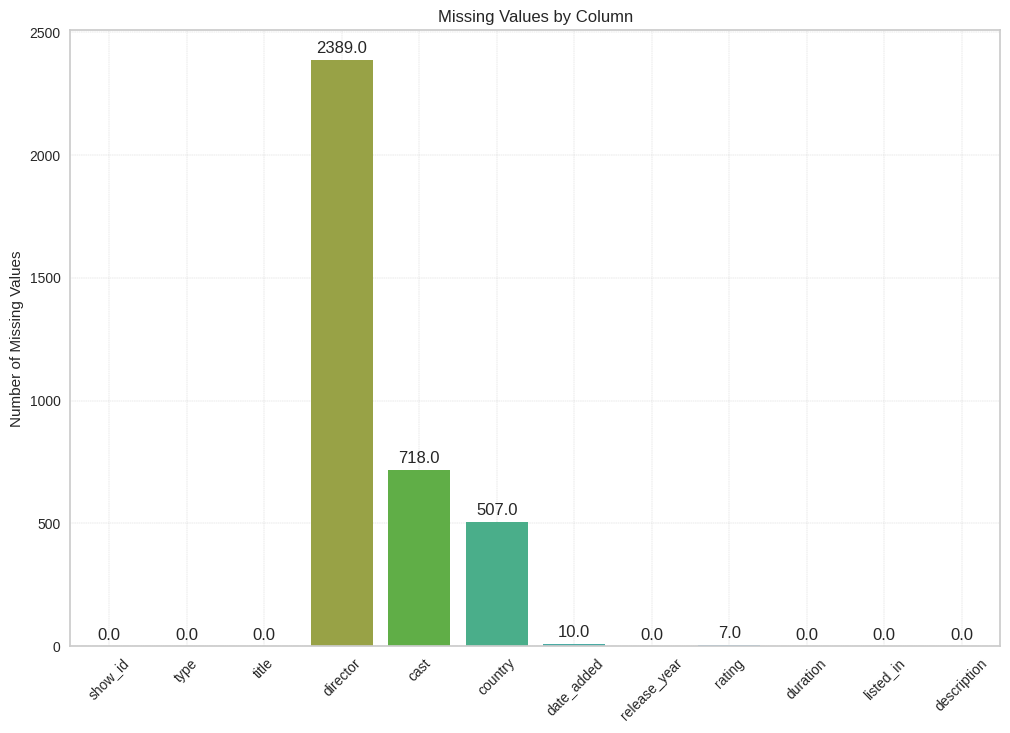

In [10]:
# Visualizing the missing values
plt.figure(figsize=(12, 8))
plots = sns.barplot(x=data.columns, y=data.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Missing Values by Column")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### What did you know about your dataset?

1. The Netflix Movies and TV Shows Clustering Dataset consists of rows:7787 and columns:12.

2. Then we check the info of our data and found only one column is int type and remaning are object type columns.

3. Next we check duplicate value and there is no duplicate value in our data.

4. Then we check missing value in our data set and found missing value in director, cast, country, date_added and rating columns and also visualize the missing value and show that the highest  missing value in director column.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
columns = data.columns
print("Columns:")
for column in columns:
    print(column)

Columns:
show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [12]:
# Dataset Describe
data.describe(include='all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Variables Description

1. **show_id:** An identifier for each movie or TV show on Netflix.

2. **type:** Indicates whether the entry is a "movie" or a "TV show."

3. **title:** The title of the movie or TV show.

4. **director:** The director(s) of the movie or TV show.

5. **cast:** The cast or actors involved in the movie or TV show.

6. **country:** The country or countries where the movie or TV show was produced or is available.

7. **date_added:** The date when the movie or TV show was added to the Netflix platform.

8. **release_year:** The year when the movie or TV show was originally released.

9. **rating:** The content rating or maturity rating assigned to the movie or TV show.

10. **duration:** The duration or runtime of the movie or TV show.

11. **listed_in:** The category or genre in which the movie or TV show is classified on Netflix.

12. **description:** A brief description or summary of the movie or TV show's plot or content.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for column in data.columns:
    num_unique_values = data[column].nunique()
    print(f"Number of unique values in {column}: {num_unique_values}")
    print("-" * 30)

Number of unique values in show_id: 7787
------------------------------
Number of unique values in type: 2
------------------------------
Number of unique values in title: 7787
------------------------------
Number of unique values in director: 4049
------------------------------
Number of unique values in cast: 6831
------------------------------
Number of unique values in country: 681
------------------------------
Number of unique values in date_added: 1565
------------------------------
Number of unique values in release_year: 73
------------------------------
Number of unique values in rating: 14
------------------------------
Number of unique values in duration: 216
------------------------------
Number of unique values in listed_in: 492
------------------------------
Number of unique values in description: 7769
------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Summing null values
print('Missing Data Count')
data.isna().sum()[data.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [15]:
# Now we check missing data in percentage

print('Missing Data Percentage')
print(round(data.isna().sum()[data.isna().sum() > 0].sort_values(ascending=False)/len(data)*100,2))

Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [16]:
# Creating a function to handle missing values

def handle_missing_values(df):
    df['director'].fillna('Unknown', inplace=True)
    df['cast'].fillna('Unknown', inplace=True)
    df['country'].fillna('Unknown', inplace=True)
    return df

# Call the function to handle missing values
data = handle_missing_values(data)

# Dropping remaining null values of date_added and rating
data.dropna(axis=0, inplace=True)



In [17]:
# Checking that missing value treatment is done
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
# Now we convert date_assed column in to date time and also create some new column for Data Vizualization
# Convert the "date_added" column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract year, month, and day as separate integer columns
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day

# Drop the "date_added" column
data.drop(columns=['date_added'], inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
 11  year_added    7770 non-null   int64 
 12  month_added   7770 non-null   int64 
 13  day_added     7770 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 910.5+ KB


In [20]:
# Now we create a copy of our data set as a copy_data and unnest the copy_data set.

copy_data = data.copy()


In [21]:
# Unnesting 'Directors' column
dir_constraint=copy_data['director'].apply(lambda x: str(x).split(', ')).tolist()
cd1 = pd.DataFrame(dir_constraint, index = copy_data['title'])
cd1 = cd1.stack()
cd1 = pd.DataFrame(cd1.reset_index())
cd1.rename(columns={0:'Directors'},inplace=True)
cd1 = cd1.drop(['level_1'],axis=1)
cd1.sample(10)

title           Directors
2721            Great Interior Design Challenge             Unknown
2281                                     Fartsa             Unknown
1214                               Buffalo Boys         Mike Wiluan
7790                   Tottaa Pataaka Item Maal    Aditya Kripalani
1760                         Dawn of the Croods             Unknown
1345                         Celebrity Marriage       Pascal Amanfo
4508         Monster High: Friday Night Frights     Dustin McKenzie
6855  The Drunk and on Drugs Happy Funtime Hour             Unknown
7487                                    The Son  Sebastián Schindel
1605                                     Cooked             Unknown

In [22]:
# Unnesting 'cast' column
cast_constraint=copy_data['cast'].apply(lambda x: str(x).split(', ')).tolist()
cd2 = pd.DataFrame(cast_constraint, index = copy_data['title'])
cd2 = cd2.stack()
cd2 = pd.DataFrame(cd2.reset_index())
cd2.rename(columns={0:'Actors'},inplace=True)
cd2 = cd2.drop(['level_1'],axis=1)
cd2.sample(10)

title               Actors
31783    Natural Born Pranksters  Vitaly Zdorovetskiy
55544                       Wolf     Firat Doğruloğlu
40991                     Soorma      Mahabir Bhullar
27407               Luna Petunia         Ciara Alexys
17918  GODZILLA The Planet Eater           Reina Ueda
15365           Fakta Ladh Mhana    Aniket Vishwasrao
37379                       Rita        Lise Baastrup
393           100 Days My Prince        Doh Kyung-soo
17101          Gangs of New York        Jim Broadbent
7090             Black Hawk Down      Gabriel Casseus

In [23]:
# Merging director and cast
cd3 = cd2.merge(cd1,on=['title'],how='inner')

# Head of final merged dataframe
cd3.head()

title            Actors Directors
0    3%       João Miguel   Unknown
1    3%  Bianca Comparato   Unknown
2    3%      Michel Gomes   Unknown
3    3%   Rodolfo Valente   Unknown
4    3%   Vaneza Oliveira   Unknown

In [24]:
# Merging unnested data with the created dataframe in order to make the final dataframe
copy_data = cd3.merge(copy_data[['type', 'title','country','release_year', 'rating', 'duration','listed_in','description','year_added','month_added','day_added']],on=['title'],how='left')
copy_data.head()

title            Actors Directors     type country  release_year rating  \
0    3%       João Miguel   Unknown  TV Show  Brazil          2020  TV-MA   
1    3%  Bianca Comparato   Unknown  TV Show  Brazil          2020  TV-MA   
2    3%      Michel Gomes   Unknown  TV Show  Brazil          2020  TV-MA   
3    3%   Rodolfo Valente   Unknown  TV Show  Brazil          2020  TV-MA   
4    3%   Vaneza Oliveira   Unknown  TV Show  Brazil          2020  TV-MA   

    duration                                          listed_in  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
2  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
3  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
4  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  In a future where the elite inhabit an island ...        2020            8   
2  In a future where the elite inhabit an island ...        2020            8   
3  In a future where the elite inhabit an island ...        2020            8   
4  In a future where the elite inhabit an island ...        2020            8   

   day_added  
0         14  
1         14  
2         14  
3         14  
4         14

In [25]:
# Filter data for Movies and TV Shows for Data Vizualization
movies_data = copy_data[copy_data['type'] == 'Movie']
tv_shows_data = copy_data[copy_data['type'] == 'TV Show']

### What all manipulations have you done and insights you found?

**1. Summing Null Values:** I began by identifying and quantifying the missing values in the dataset. This initial step is crucial to understand the data quality.

**2. Handling Missing Values:** To ensure data completeness, I addressed missing values in specific columns. In particular, I replaced missing values in the "director," "cast," and "country" columns with 'Unknown.' This decision was made to avoid data loss and maintain the integrity of the dataset.

**3. Dropping Remaining Null Values:** Rows with missing values in the "date_added" and "rating" columns were removed from the dataset. This step was taken to maintain data consistency and improve its quality.

**4. Conversion to Datetime:** I transformed the "date_added" column into a datetime format. This conversion allowed me to extract and work with temporal information.

**5. Creating Date-Related Columns:** Subsequently, I created new columns, namely "year_added," "month_added," and "day_added," to separate and store the year, month, and day of addition. These columns would be invaluable for time-based analysis.

**6. Dropping "date_added" Column:** I removed the original "date_added" column after extracting the necessary temporal information. This simplification of the dataset structure aids in subsequent analysis.

**7. Data Unnesting:** I performed data unnesting for both the "director" and "cast" columns. This transformation allowed me to break down the comma-separated entries into individual rows, ensuring that each movie or TV show was associated with its respective directors and cast members. This granular level of data is crucial for deeper analysis.

**8.Data Splitting:** To facilitate separate analyses for movies and TV shows, I divided the dataset into two distinct dataframes, "movies_data" and "tv_shows_data." This separation enables specific insights into each content type.


***Insights:***

Handling missing values is essential for ensuring data completeness and reliability.

The creation of new date-related columns provides temporal context for subsequent analysis.

Data unnesting increases the granularity of the dataset, allowing for more detailed examinations of directors and cast members.

Splitting the dataset into movies and TV shows supports content-specific analyses and insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - **Pie Chart of Content Types**

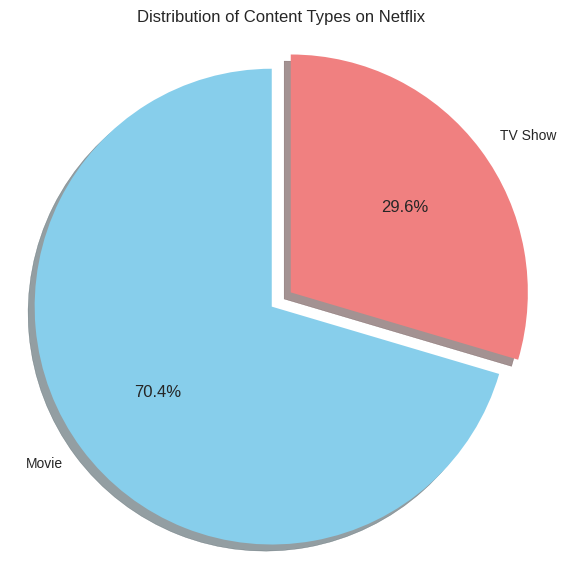

In [26]:
# Pie Chart of Content Types
# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = copy_data['type'].value_counts()
plt.figure(figsize=(7,7))

# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index,colors=['skyblue', 'lightcoral'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

We chose a pie chart to visualize the distribution of content types (Movies and TV Shows).

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the majority of content on Netflix consists of Movies(70.4%,Movies) and TV Shows make up a significant portion of the content as well (29.6%,TV Shows).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dominance of Movies in the content library suggests that Netflix may consider diversifying its offerings further by producing or acquiring more TV Shows to cater to different viewer preferences.

#### Chart - 2 - **Distribution of Ratings for Movies & TV Shows**

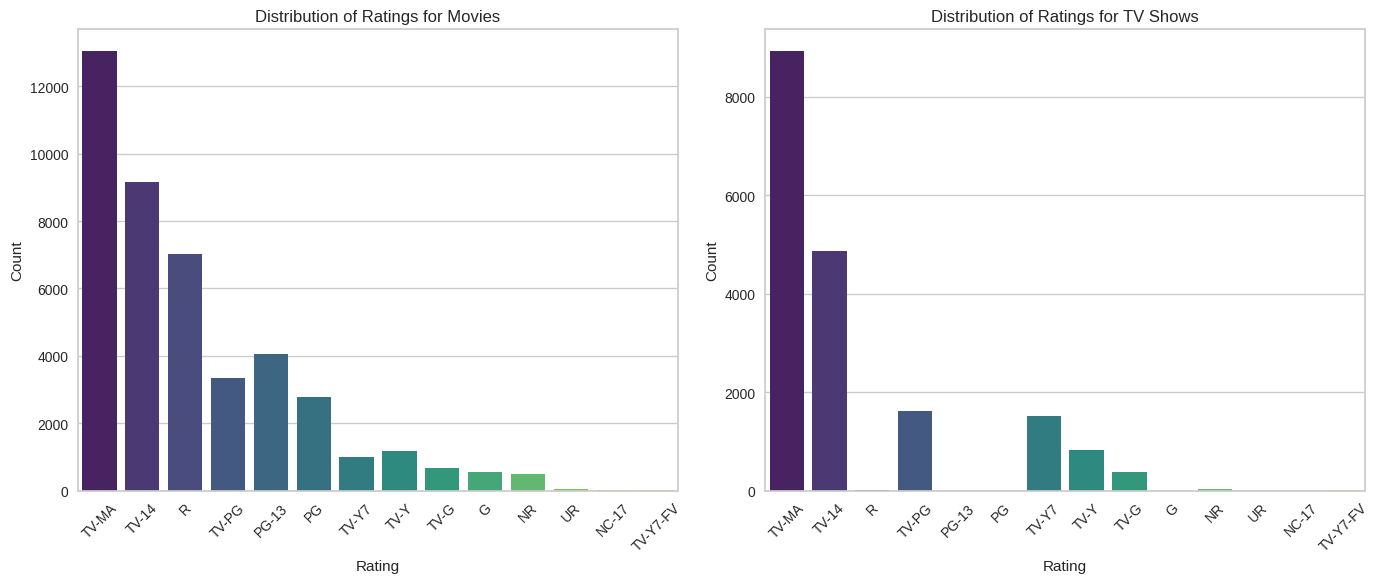

In [27]:
# Distribution of Ratings for Movies & TV Shows

# Create subplots for Movies and TV Shows
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Distribution of Ratings for Movies
sns.countplot(data=copy_data[copy_data['type'] == 'Movie'], x='rating', order=copy_data['rating'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Ratings for Movies')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')

# Plot Distribution of Ratings for TV Shows
sns.countplot(data=copy_data[copy_data['type'] == 'TV Show'], x='rating', order=copy_data['rating'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Ratings for TV Shows')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart format allows for a clear comparison of ratings distribution between the two content types.

##### 2. What is/are the insight(s) found from the chart?

The most common rating category is "TV-MA" (Mature Audiences), followed by "TV-14" (Parents Strongly Cautioned).

TV Shows generally have a similar rating distribution to Movies but with fewer options suitable for younger audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights into the distribution of ratings for Movies and TV Shows can help Netflix in content recommendation and targeting specific audience segments.

#### Chart - 3 - **Number of Titles(Movies and TV_Shows) per Country (Top 10)**

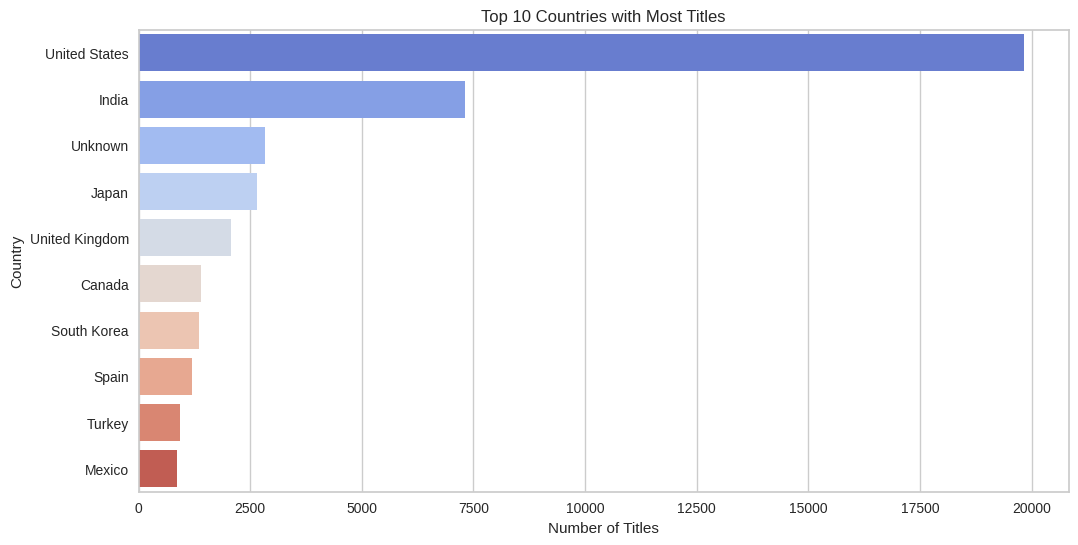

In [28]:
# Number of Titles(Movies and TV_Shows) per Country (Top 10)

plt.figure(figsize=(12, 6))
top_countries = copy_data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

This horizontal bar chart format effectively displays the rankings of countries with the most content titles (Movies and TV Shows).

##### 2. What is/are the insight(s) found from the chart?

The number of titles varies significantly between these countries, with the United States having the most extensive content library, followed by India and United Kingdom.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix may consider investing more in content from countries like India and the United Kingdom, where there is a substantial viewer base.

#### Chart - 4 - **Distribution of Release Years**

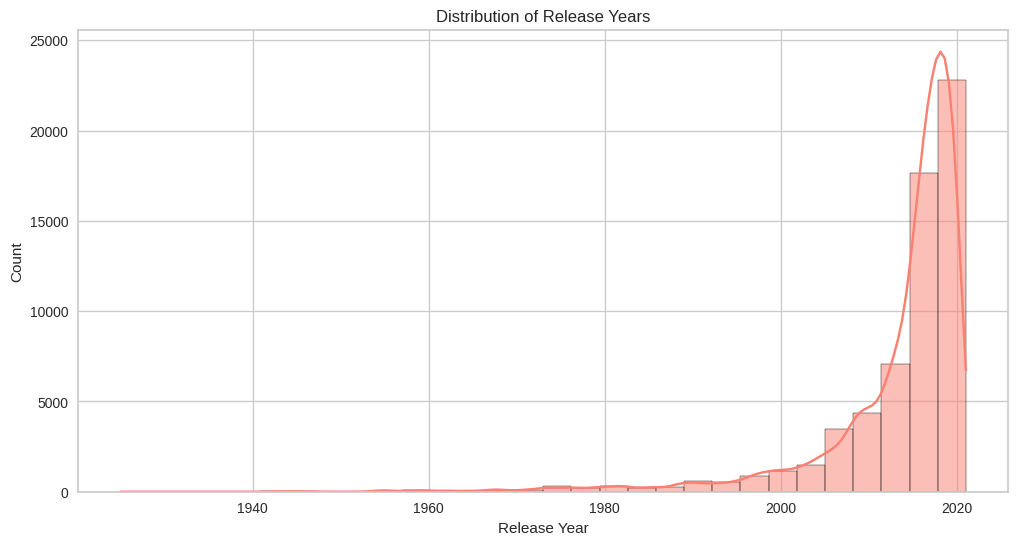

In [29]:
# Distribution of Release Years

plt.figure(figsize=(12, 6))
sns.histplot(copy_data['release_year'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

We chose a histogram with a kernel density estimation (KDE) overlay to visualize the distribution of release years for movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

The number of content titles tends to increase in more recent years, indicating a growing library of newer releases(2000 to 2020).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The increasing number of content titles in recent years may suggest that focusing on acquiring newer content is a viable strategy to keep the library fresh and attract viewers.

#### Chart - 5 - **Most Used Word In Title of Content on Netflix**

There are 1097396 words in the combination of all titles.


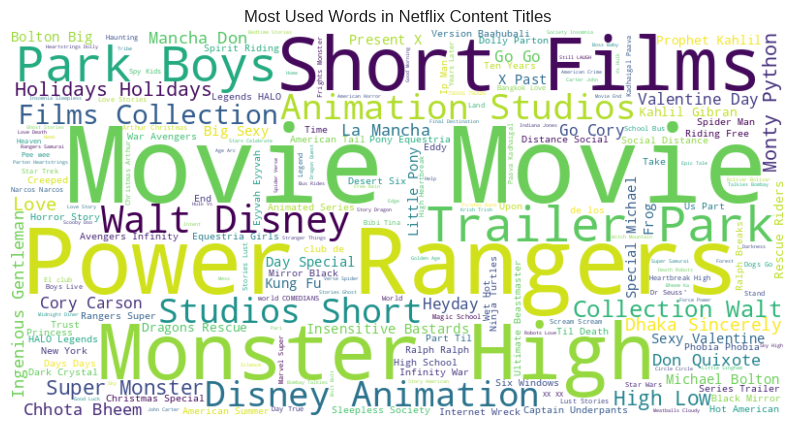

In [30]:
# Chart - 5 visualization code
# Concatenate all titles into a single text string
all_titles = ' '.join(topic for topic in copy_data.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(all_titles)))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels and ticks
plt.title('Most Used Words in Netflix Content Titles')
plt.show()



##### 1. Why did you pick the specific chart?

We chose a word cloud chart to visualize the most frequently used words in the titles of content available on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The most used words for movies like "MOVIE","LOVE","LIKE","TRAILER"and "HORROR STORY"  and for TV Shows word like "POWER RANGERS","ANIMATION STUDIOS","MONSTER","CHHOTA BHEEM".

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Effective marketing and promotion of content with popular words can attract a larger audience.

#### Chart - 6 - **Word Cloud of Top Genres (Listed In) In Netflix**

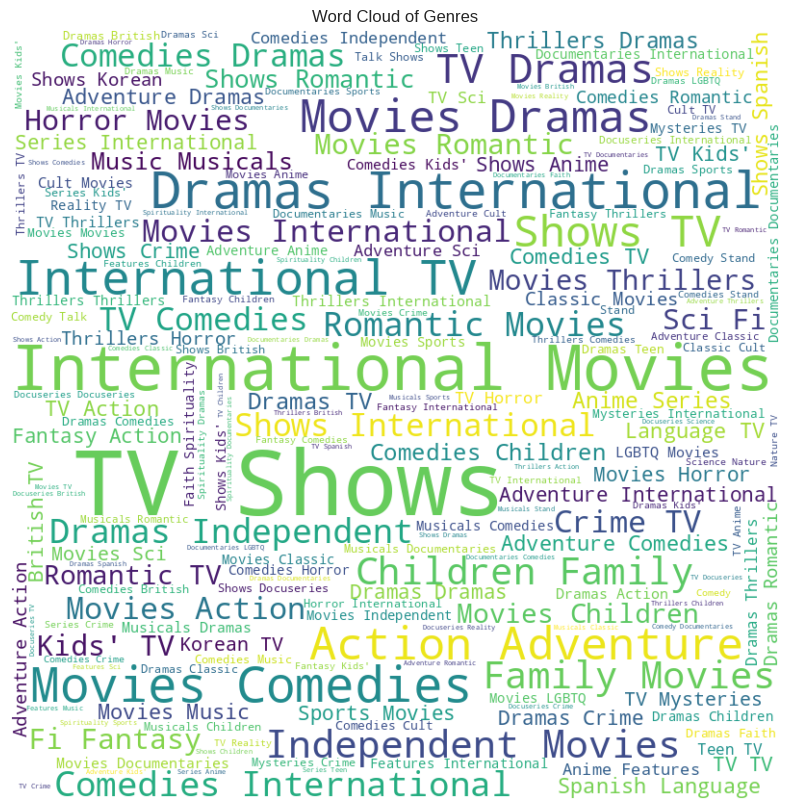

In [31]:
# Word Cloud of Genres (Listed In)

plt.figure(figsize=(10, 10))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=800).generate(' '.join(copy_data['listed_in']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()


##### 1. Why did you pick the specific chart?

We chose a word cloud chart to visualize the most frequently occurring genres listed in the content descriptions on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Popular genres such as "Dramas," "Comedies," "Action & Adventure," and "International Movies" are prominent, indicating the diversity of content available,Other genres like "Family Features," "Children & Family Movies," and "Romantic Movies" reflect the availability of family-friendly and romantic content, Words like "TV Dramas" and "TV Comedies" suggest the presence of both TV shows and movies within these genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this chart can positively impact content categorization and recommendations.

#### Chart - 7 - **Plotting Seasons Distribution for TV Shows**

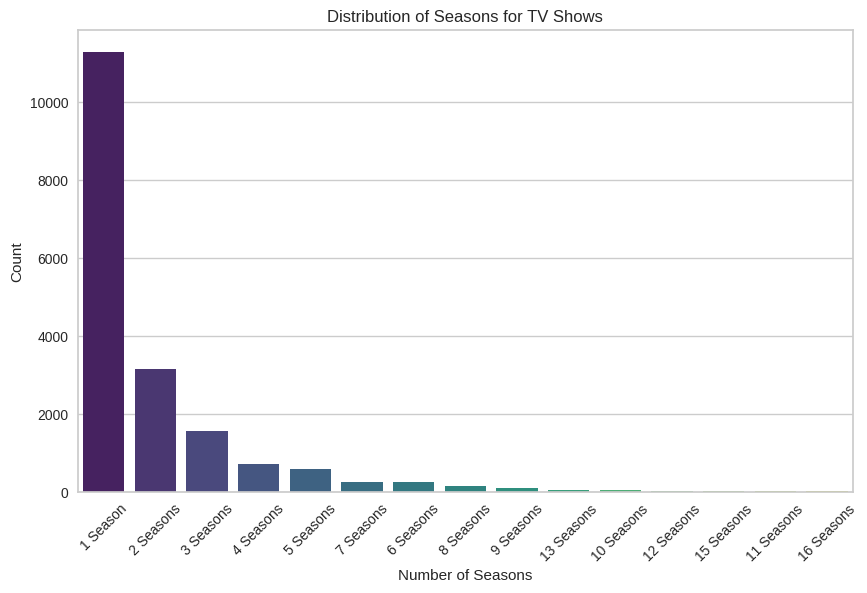

In [32]:
# Create a bar plot for seasons distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=tv_shows_data, x='duration', order=tv_shows_data['duration'].value_counts().index, palette='viridis')
plt.title('Distribution of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()


##### 1. Why did you pick the specific chart?

We chose a bar plot to visualize the distribution of seasons for TV shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

TV shows with a single season ("1 Season") are the most common, indicating a significant presence of mini-series or single-season shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on popular TV show formats, such as single-season series, can attract a diverse audience.

#### Chart - 8 - **Distribution of Duration (Runtime)**

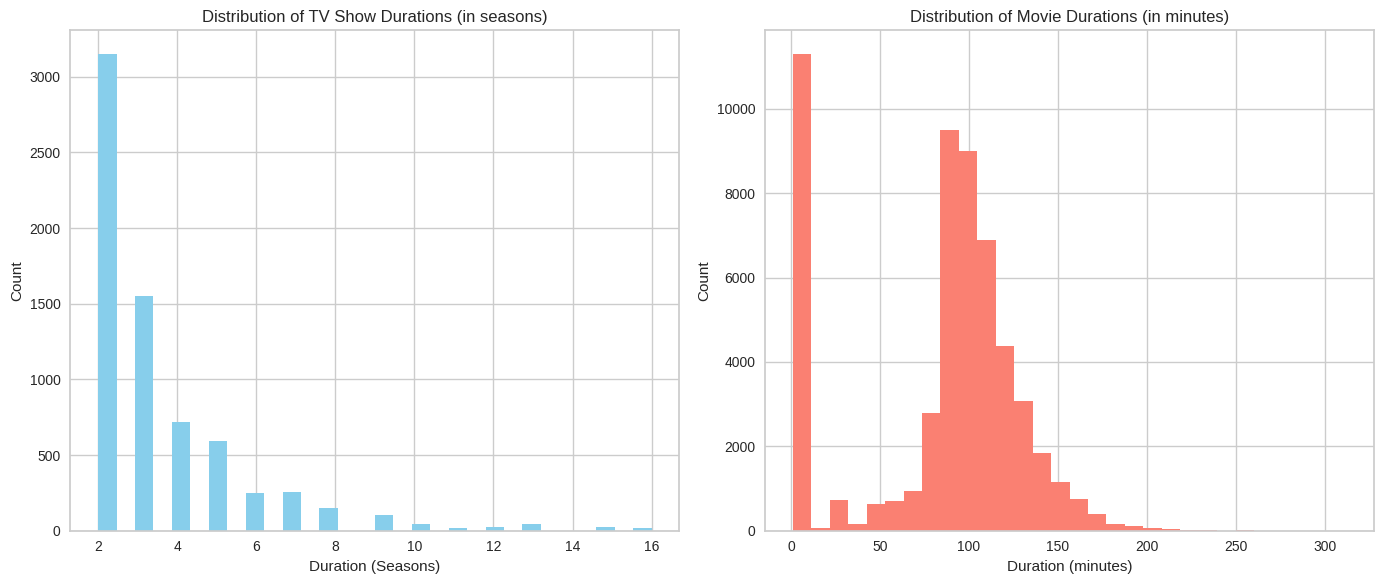

In [33]:
# Function to clean and convert duration values
def clean_and_convert_duration(duration_str):
    if 'Seasons' in duration_str:
        return None, int(duration_str.split(' ')[0])  # Return None for TV shows
    else:
        return int(duration_str.split(' ')[0]), None  # Return None for movies

# Create temporary Series for movie durations and TV show durations
movie_durations, tvshow_durations = zip(*copy_data['duration'].apply(clean_and_convert_duration))

import matplotlib.pyplot as plt

# Filter out None values from movie_durations and tvshow_durations
filtered_movie_durations = [duration for duration in movie_durations if duration is not None]
filtered_tvshow_durations = [duration for duration in tvshow_durations if duration is not None]

# Create separate subplots for TV shows and movies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot TV Show durations (filtered)
axes[0].hist(filtered_tvshow_durations, bins=30, color='skyblue')
axes[0].set_title('Distribution of TV Show Durations (in seasons)')
axes[0].set_xlabel('Duration (Seasons)')
axes[0].set_ylabel('Count')

# Plot Movie durations (filtered)
axes[1].hist(filtered_movie_durations, bins=30, color='salmon')
axes[1].set_title('Distribution of Movie Durations (in minutes)')
axes[1].set_xlabel('Duration (minutes)')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

We chose two histograms to visualize the distribution of durations for TV shows (in seasons) and movies (in minutes) separately.

##### 2. What is/are the insight(s) found from the chart?

1. The most common duration for TV shows is a single season, followed by two seasons.

2. The distribution of movie durations is right-skewed, with a peak around 80-100 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recommendations can include TV shows with preferred season lengths and movies with durations that match viewer preferences.

#### Chart - 9 - **Top Movie and TV Show Directors are-**

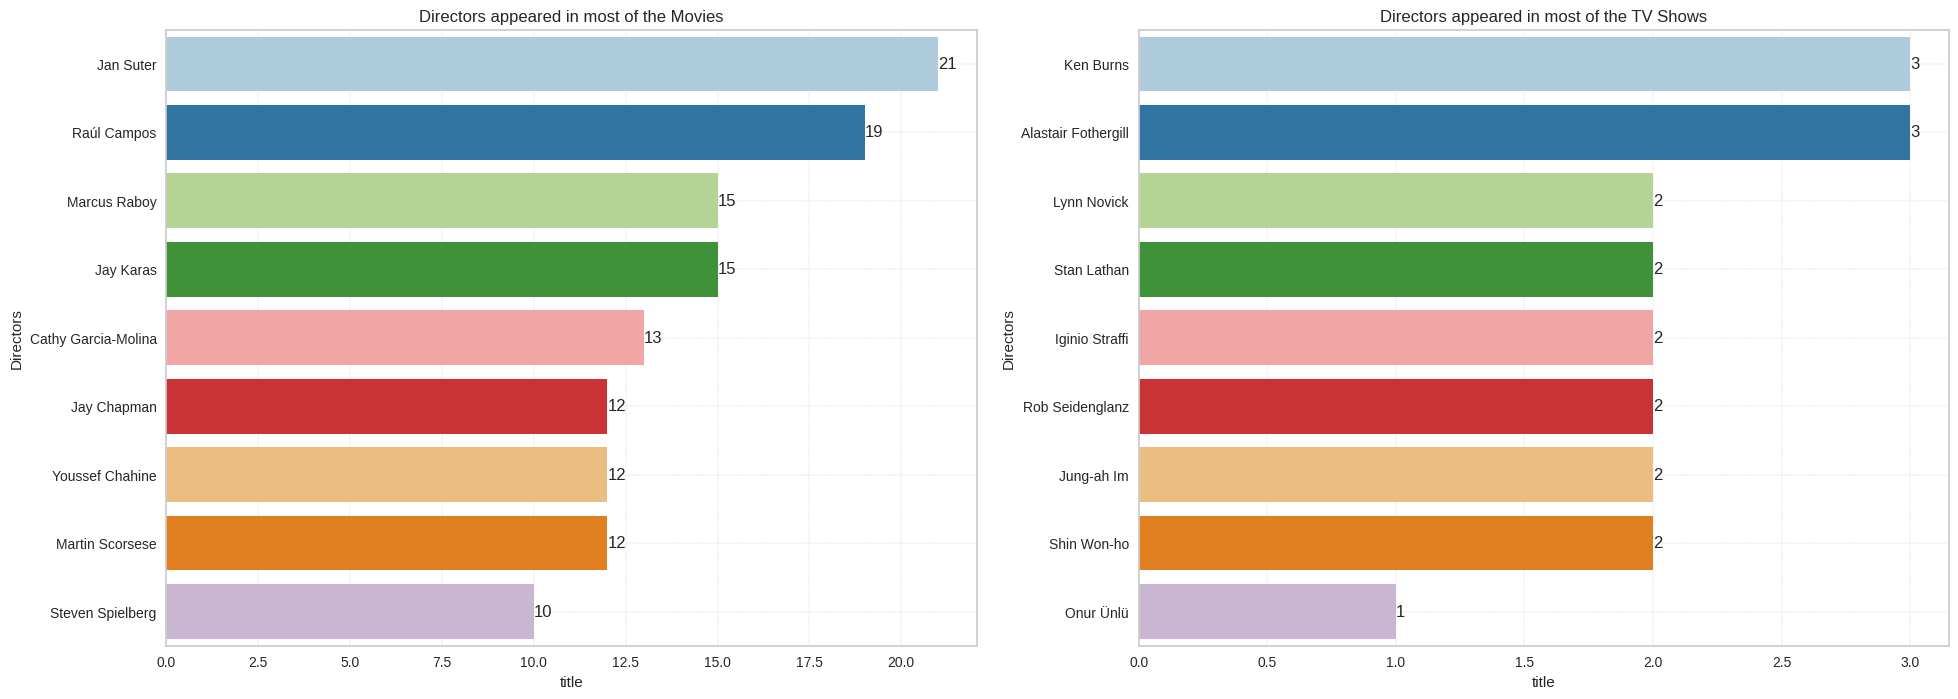

In [34]:

# Top 10 Directors in Movies and TV Shows
plt.figure(figsize=(23,8))
for i,j,k in ((movies_data, 'Movies',0),(tv_shows_data, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

This chart visualizes the top directors who have worked on the most movies and TV shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

In the "Movies" category, the director "Jan Suter" has directed the highest number of movies among the top directors.

In the "TV Shows" category, the director "Ken Burns" and "Alastair Fothergill" is the top directors, having worked on the most TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Collaborating with top directors for future projects can enhance the quality and appeal of Netflix's content.

#### Chart - 10 - **Top Movie and Tv Show Actors are**

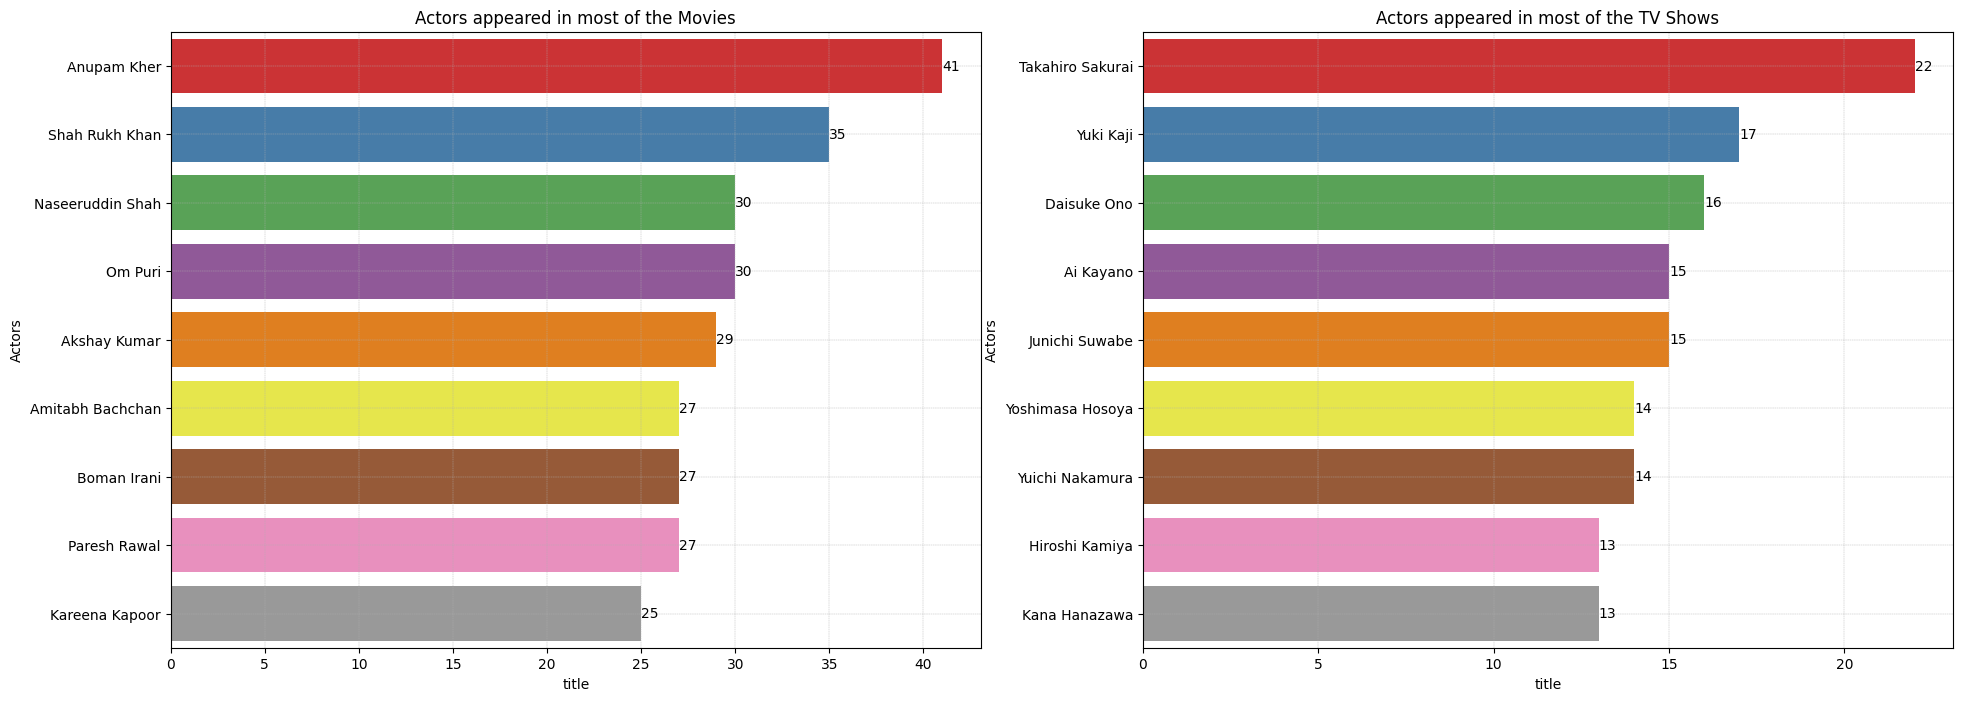

In [35]:
# Top 10 casts in Movies and TV Shows
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((movies_data, 'Movies',0),(tv_shows_data, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

This chart visualizes the top actors who have appeared in the most movies and TV shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The insight that i found is most of the top actors are from india in movies on Netflix Like - "Anupam Kher", "Shah Rukh Khan" and "Om Puri" etc.

In the "TV Shows" category, the actor "Takahiro Sakurai" is the top actor, having appeared in the most TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help Netflix recognize and promote actors who have a strong presence in its content library.

#### Chart - 11 - **The Total Number of Movies and TV Shows Added Per Year**

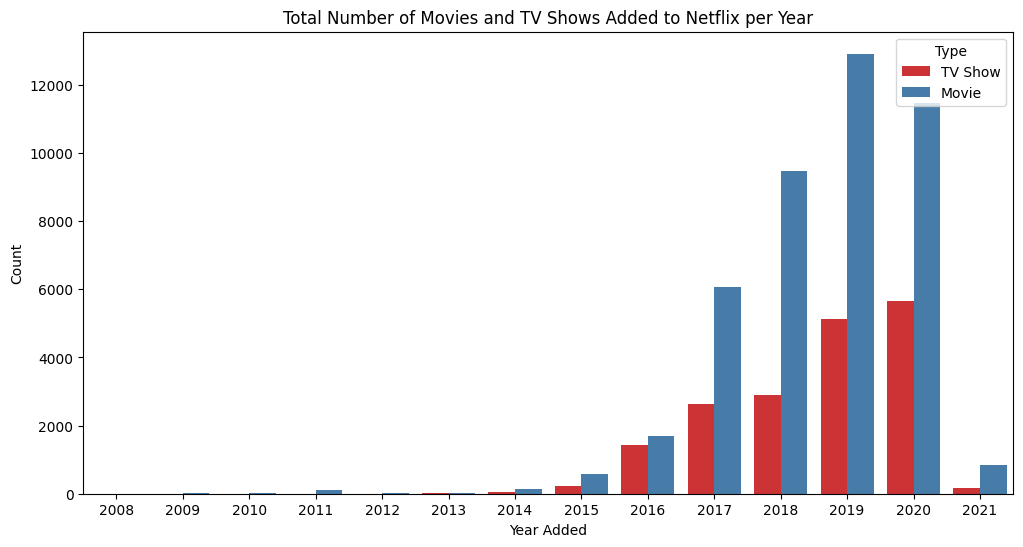

In [36]:
# Create a bar plot to show the total number of movies and TV shows added per year
plt.figure(figsize=(12, 6))
sns.countplot(data=copy_data, x='year_added', hue='type', palette='Set1')
plt.title('Total Number of Movies and TV Shows Added to Netflix per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper right')

plt.show()

##### 1. Why did you pick the specific chart?

This chart visualizes the total number of movies and TV shows added to Netflix per year.

##### 2. What is/are the insight(s) found from the chart?

1. Netflix has been consistently adding more movies than TV shows to its platform each year.

2. The number of movies added has shown a general upward trend over the years, with a significant increase starting around 2015.

3. The number of TV shows added has also increased but at a slower pace compared to movies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help Netflix understand its content acquisition and release strategy over the years.


By recognizing trends in content additions, Netflix can optimize its future content acquisition efforts.

#### Chart - 12 - **The Total Number of Movies and TV Shows Added Per Month**

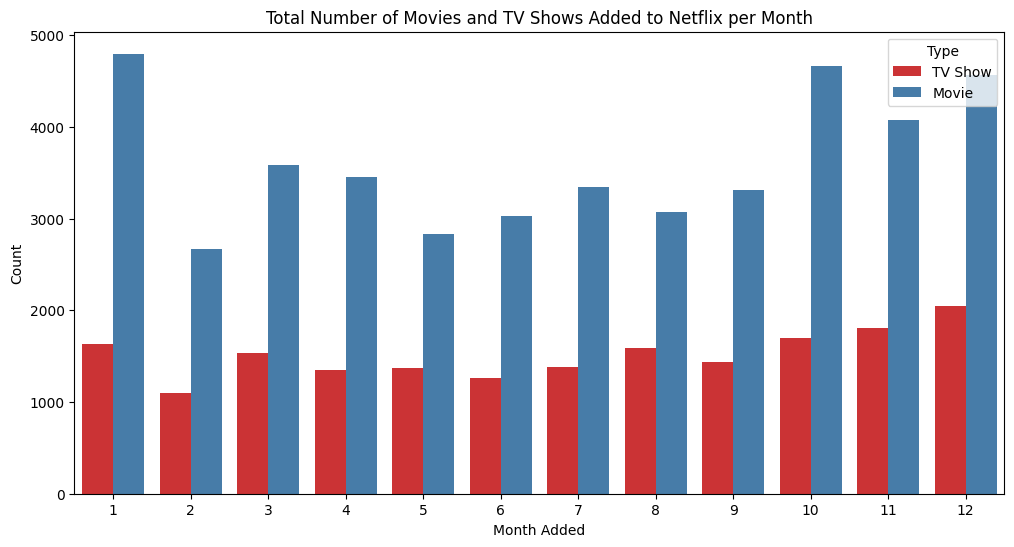

In [37]:
# Create a bar plot to show the total number of movies and TV shows added per month
plt.figure(figsize=(12, 6))
sns.countplot(data=copy_data, x='month_added', hue='type', palette='Set1')
plt.title('Total Number of Movies and TV Shows Added to Netflix per Month')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper right')

plt.show()

##### 1. Why did you pick the specific chart?

This chart visualizes the total number of movies and TV shows added to Netflix per month.

##### 2. What is/are the insight(s) found from the chart?

1. January, October and November are the most popular months for movie addition.

2. We found that October, November and December are the most popular months for TV shows addition.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions.

This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

#### Chart - 13 - **The Total Number of Movies and TV Shows Added Per Day**

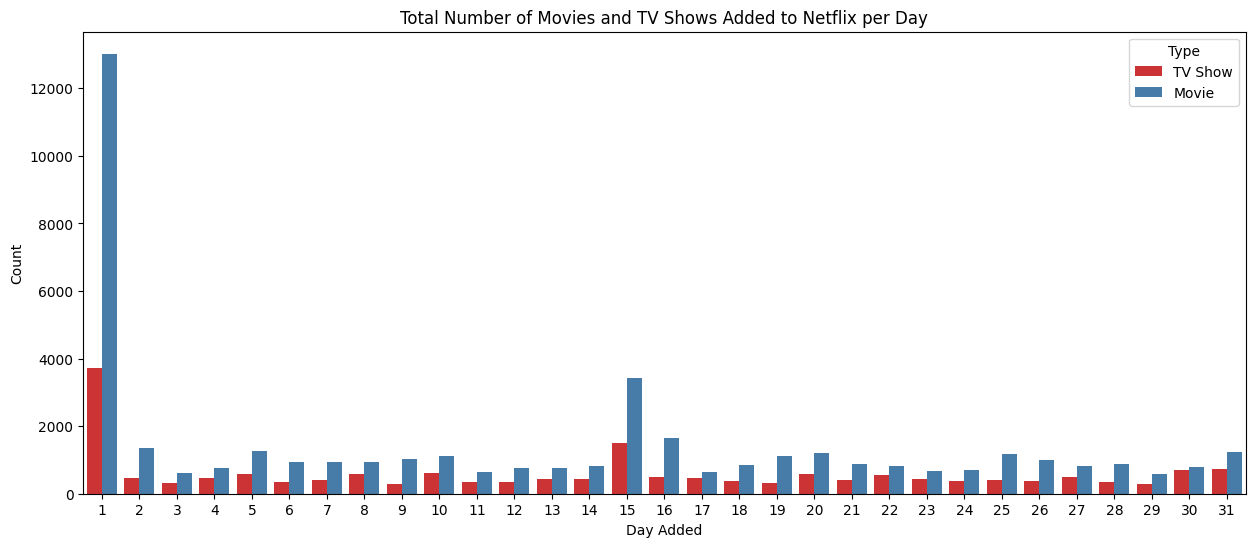

In [38]:
# Create a bar plot to show the total number of movies and TV shows added per day
plt.figure(figsize=(15, 6))
sns.countplot(data=copy_data, x='day_added', hue='type', palette='Set1')
plt.title('Total Number of Movies and TV Shows Added to Netflix per Day')
plt.xlabel('Day Added')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper right')

plt.show()

##### 1. Why did you pick the specific chart?

This chart visualizes the total number of movies and TV shows added to Netflix per day.

##### 2. What is/are the insight(s) found from the chart?

1. There is considerable daily variability in the number of content additions.

2. Some days witness a higher number of additions(Like day1,day2,day15 and etc), while others have fewer or no additions(Like day23,day24,day29 etc).

3. Movies consistently have a higher count of additions compared to TV shows on most days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can use this data to track daily content additions and understand the patterns,
High-content addition days can be leveraged for marketing and user engagement efforts,
Understanding daily variations helps in resource allocation and scheduling for content releases.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 - For Chart 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The proportion of TV shows added on Netflix that are produced in the India is not significantly different from the proportion of movies added on Netflix that are produced in the India.

**Alternative Hypothesis:** The proportion of TV shows added on Netflix that are produced in the India is significantly different from the proportion of movies added on Netflix that are produced in the India.

#### 2. Perform an appropriate statistical test.

In [39]:
#### 2. Perform an appropriate statistical test.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(tv_shows_data['country'].str.contains('India')) / len(tv_shows_data)
movie_proportion = np.sum(movies_data['country'].str.contains('India')) / len(movies_data)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(tv_shows_data)), int(movie_proportion * len(movies_data))]
nobs = [len(tv_shows_data), len(movies_data)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis. \nThe proportion of TV shows added on Netflix that are produced in the India is significantly different from the proportion of movies added on Netflix that are produced in the India.")
else:
    print(f"Accept the null hypothesis. \nThe proportion of TV shows added on Netflix that are produced in the India is significantly different from the proportion of movies added on Netflix that are produced in the India.")

z-statistic:  -50.66348293513317
p-value:  0.0
Reject the null hypothesis. 
The proportion of TV shows added on Netflix that are produced in the India is significantly different from the proportion of movies added on Netflix that are produced in the India.


##### Which statistical test have you done to obtain P-Value?

The statistical test used is the proportions z-test.

##### Why did you choose the specific statistical test?

The proportions z-test is selected because it is suitable for comparing proportions between two groups, which aligns with the goal of comparing the proportion of TV shows produced in India to the proportion of movies produced in the India on Netflix.

### Hypothetical Statement - 2 - For Chart 8

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average duration of movies on Netflix is the same as the average duration of TV shows on Netflix.

**Alternative Hypothesis (H1):** The average duration of movies on Netflix is different from the average duration of TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

# Filter out None values from movie_durations and tvshow_durations
filtered_movie_durations = [duration for duration in movie_durations if duration is not None]
filtered_tvshow_durations = [duration for duration in tvshow_durations if duration is not None]

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(filtered_movie_durations, filtered_tvshow_durations, equal_var=False)

print('p-value: ', p_value)
print('t-statistic: ', t_stat)

# Define significance level (alpha)
alpha = 0.05

# Compare p-value to alpha to make a decision
if p_value < alpha:
    result = "Reject the null hypothesis. \nThe average duration of movies on Netflix is different from the average duration of TV shows on Netflix."
else:
    result = "Accept the null hypothesis. \nThe average duration of movies on Netflix is the same as the average duration of TV shows on Netflix."

print(result)


p-value:  0.0
t-statistic:  382.88512742476763
Reject the null hypothesis. 
The average duration of movies on Netflix is different from the average duration of TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test used is the two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test is chosen because it is appropriate for comparing means of two independent groups, which aligns with the goal of comparing the average duration of movies to the average duration of TV shows on Netflix.

### Hypothetical Statement - 3 - For Chart 12

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average number of TV shows added to Netflix per month is the same as the average number of movies added to Netflix per month.

**Alternative Hypothesis (H1):** The average number of TV shows added to Netflix per month is different from the average number of movies added to Netflix per month.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

# Separate the data into TV shows and movies
tv_shows_added_per_month = copy_data[copy_data['type'] == 'TV Show']['month_added'].value_counts()
movies_added_per_month = copy_data[copy_data['type'] == 'Movie']['month_added'].value_counts()

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(tv_shows_added_per_month, movies_added_per_month, equal_var=False)

print('p-value: ' , p_value)
print('t-statistic: ', t_stat)

# Define significance level (alpha)
alpha = 0.05

# Compare p-value to alpha to make a decision
if p_value < alpha:
    result = "Reject the null hypothesis. \nThe average number of TV shows added to Netflix per month is different from the average number of movies added to Netflix per month."
else:
    result = "Accept the null hypothesis. \nThe average number of TV shows added to Netflix per month is the same as the average number of movies added to Netflix per month."

print(result)

p-value:  2.6953057348620085e-07
t-statistic:  -9.310403091447274
Reject the null hypothesis. 
The average number of TV shows added to Netflix per month is different from the average number of movies added to Netflix per month.


##### Which statistical test have you done to obtain P-Value?

The statistical test used is the two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test is chosen because it is appropriate for comparing means of two independent groups, which aligns with the goal of comparing the average number of TV shows added per month to the average number of movies added per month on Netflix.

## ***6. Feature Engineering & Data Pre-processing***

In [42]:
# Here we create a another copy of data as a data_new beacuse the copy_data having more number of result after unnesting of copy_data.

data_new = data.copy()

In [43]:
# now we checking the shape of data_new and copy_data sets

data_new.shape, copy_data.shape

((7770, 14), (61626, 13))

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation
# As we done missing value treatment above now i am rechecking missing values
data_new.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
day_added       0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we done missing value treatment above so we can skip that part.



### 2. Handling Outliers

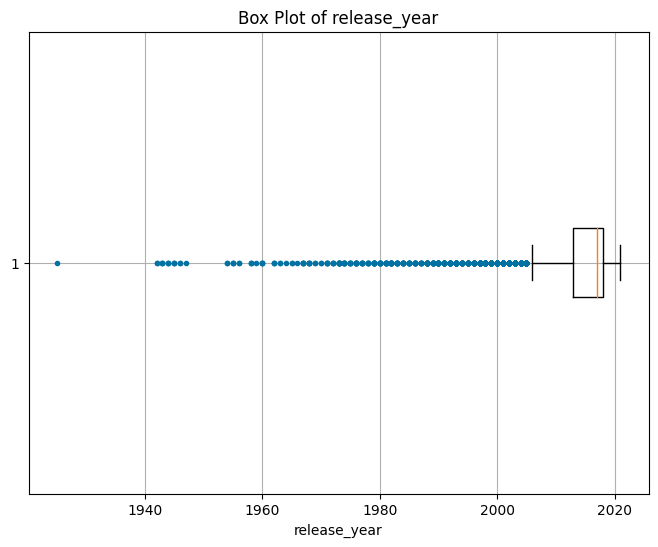

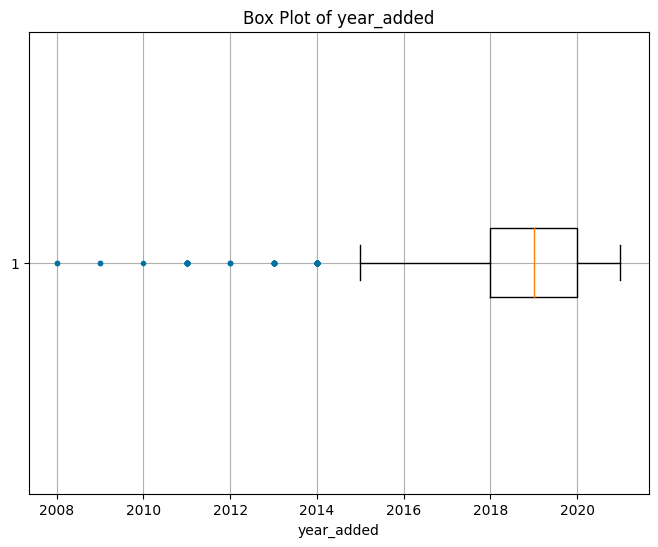

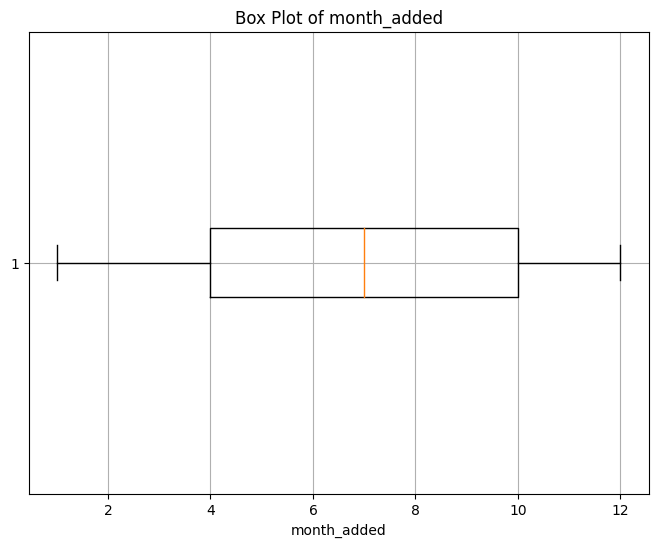

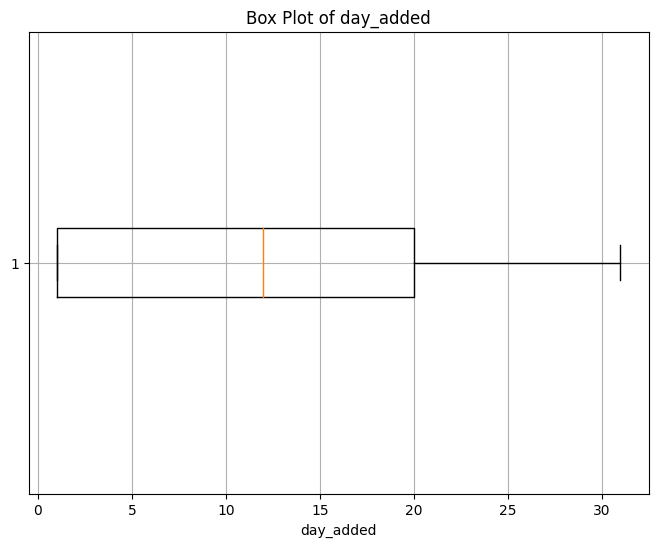

In [45]:
# Handling Outliers & Outlier treatments

# First here i am visualizing outliers

# Specify the column for which you want to visualize outliers
column_name1 = 'release_year'
column_name2 = 'year_added'
column_name3 = 'month_added'
column_name4 = 'day_added'

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_new[column_name1], vert=False, sym='b.')
plt.title(f'Box Plot of {column_name1}')
plt.xlabel(column_name1)
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.boxplot(data_new[column_name2], vert=False, sym='b.')
plt.title(f'Box Plot of {column_name2}')
plt.xlabel(column_name2)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(data_new[column_name3], vert=False, sym='b.')
plt.title(f'Box Plot of {column_name3}')
plt.xlabel(column_name3)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(data_new[column_name4], vert=False, sym='b.')
plt.title(f'Box Plot of {column_name4}')
plt.xlabel(column_name4)
plt.grid(True)
plt.show()

In [46]:
# Now i am handling outliers in release_year because it has outliers in huge amount

# Specify the column release_year
column_name = 'release_year'

# Calculate Q1 and Q3
Q1 = np.percentile(data_new[column_name], 25)
Q3 = np.percentile(data_new[column_name], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median of the column
data_new[column_name] = np.where((data_new[column_name] < lower_bound) | (data_new[column_name] > upper_bound),
                                  data_new[column_name].median(), data_new[column_name])

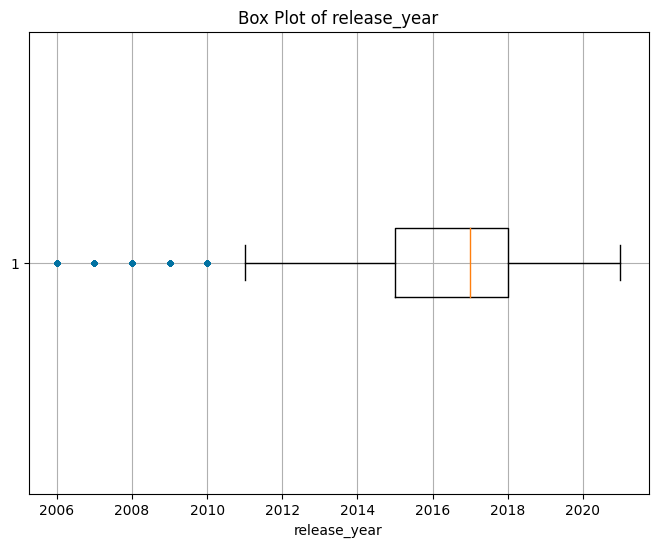

In [47]:
# Now we again visualize outliers of release_year column after the the treatment of them.

# Specify the column release_year
column_name1 = 'release_year'
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_new[column_name1], vert=False, sym='b.')
plt.title(f'Box Plot of {column_name1}')
plt.xlabel(column_name1)
plt.grid(True)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. I used box plots were created to visualize the distribution of data in each column ('release_year', 'year_added', 'month_added', 'day_added'). Box plots help identify potential outliers by showing the quartiles and any data points that fall outside the whiskers of the box.

2. I chosen the IQR method because it is a robust and commonly used technique for identifying and handling outliers. It focuses on the spread of the data and is less sensitive to extreme values than other methods, making it suitable for many datasets.

3. After the treatment of outliers in release_year column we again visualized the outliers for that column with the help of box plot and found the treatment was successfully done.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Textual Columns

In [49]:
# Combine selected text columns into a new column named 'combined_text'
data_new['combined_text'] = data_new['cast'] + ' ' + data_new['listed_in'] + ' ' + data_new['description'] + ' ' + data_new['country']

print(data_new['combined_text'].head())

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: combined_text, dtype: object


#### 2. Lower Casing

In [50]:
# Lowercasing the 'combined_text' column
data_new['combined_text'] = data_new['combined_text'].str.lower()

# Checking the manipulation
data_new['combined_text'].head()


0    joão miguel, bianca comparato, michel gomes, r...
1    demián bichir, héctor bonilla, oscar serrano, ...
2    tedd chan, stella chung, henley hii, lawrence ...
3    elijah wood, john c. reilly, jennifer connelly...
4    jim sturgess, kevin spacey, kate bosworth, aar...
Name: combined_text, dtype: object

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

# Creating a Function to remove punctuations from a text
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuations = text.translate(translator)
    return text_without_punctuations

# Apply the function to the combined_text column
data_new['combined_text'] = data_new['combined_text'].apply(remove_punctuations)

# Checking the manipulation
data_new['combined_text'].head()

0    joão miguel bianca comparato michel gomes rodo...
1    demián bichir héctor bonilla oscar serrano aza...
2    tedd chan stella chung henley hii lawrence koh...
3    elijah wood john c reilly jennifer connelly ch...
4    jim sturgess kevin spacey kate bosworth aaron ...
Name: combined_text, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

# Function to remove URLs and words/digits containing digits from text
def remove_urls_and_digits(text):
    # Remove URLs
    text_without_urls = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove words/digits containing digits
    text_without_digits = re.sub(r'\w*\d\w*', '', text_without_urls)

    return text_without_digits

# Apply the function to the combined_text column
data_new['combined_text'] = data_new['combined_text'].apply(remove_urls_and_digits)




In [53]:

# Checking the observation after manipulation
data_new.iloc[281,]['combined_text']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema comedies international movies scifi  fantasy due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona india'

#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
# Function to remove the stopwords and whitespaces from text
def remove_stopwords_and_whitespaces(text):

    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text


# Apply the function to the combined_text column
data_new['combined_text']= data_new['combined_text'].apply(remove_stopwords_and_whitespaces)



In [56]:

# Checking the observation after manipulation
data_new.iloc[281,]['combined_text']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema comedies international movies scifi fantasy due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona india'

#### 7. Tokenization

In [58]:
# Tokenization

# Function to tokenize text
def tokenize_text(text):
    # Use NLTK's word_tokenize function to tokenize the text into words
    words = word_tokenize(text)
    return words

# Apply the tokenization function to the 'combined_text' column
data_new['combined_text'] = data_new['combined_text'].apply(lambda x: tokenize_text(x))

# Checking the first few rows of the 'combined_text' column after tokenization
print(data_new['combined_text'].head())




0    [joão, miguel, bianca, comparato, michel, gome...
1    [demián, bichir, héctor, bonilla, oscar, serra...
2    [tedd, chan, stella, chung, henley, hii, lawre...
3    [elijah, wood, john, c, reilly, jennifer, conn...
4    [jim, sturgess, kevin, spacey, kate, bosworth,...
Name: combined_text, dtype: object


In [59]:
# Checking the observation after manipulation
data_new.iloc[281,]['combined_text']

['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona',
 'india']

#### 8. Text Normalization

In [60]:
# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text (changing the given word into meaningfull word)
def lemmatizing_sentence(text):

    text = [lemmatizer.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

# Apply the lemmatization function to the 'combined_text' column
data_new['combined_text'] = data_new['combined_text'].apply(lemmatizing_sentence)

# Checking the first few rows of the 'normalized_text' column
print(data_new['combined_text'].head())


0    joão miguel bianca comparato michel gomes rodo...
1    demián bichir héctor bonilla oscar serrano aza...
2    tedd chan stella chung henley hii lawrence koh...
3    elijah wood john c reilly jennifer connelly ch...
4    jim sturgess kevin spacey kate bosworth aaron ...
Name: combined_text, dtype: object


In [61]:
# Checking the observation after manipulation
data_new.iloc[281,]['combined_text']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema comedy international movie scifi fantasy due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona india'

##### Which text normalization technique have you used and why?

For text normalization I used technique of lemmatization. Specifically, the WordNet Lemmatizer from the NLTK library is applied to lemmatize the words in the "combined_text" column.

Lemmatization is chosen because it reduces words to their base or dictionary form (lemma), which can help in standardizing the text and reducing word variations. This can be beneficial for various natural language processing tasks, such as text classification and sentiment analysis, as it reduces the dimensionality of the text data while retaining the essential meaning of words.

#### 9. Part of speech tagging

In [62]:
# POS Taging and tokenize the text into words before POS Taging

data_new['pos_tags'] = data_new['combined_text'].apply(lambda x: tokenize_text(x)).apply(nltk.pos_tag)

In [63]:
# Checking the first few rows of the 'combined_text' column after POS Taging

print(data_new['pos_tags'].head())

0    [(joão, NN), (miguel, NN), (bianca, NN), (comp...
1    [(demián, NN), (bichir, NN), (héctor, NN), (bo...
2    [(tedd, NN), (chan, NN), (stella, NN), (chung,...
3    [(elijah, RB), (wood, NN), (john, NN), (c, VBP...
4    [(jim, NN), (sturgess, NN), (kevin, NN), (spac...
Name: pos_tags, dtype: object


#### 10. Text Vectorization

In [64]:
# Vectorizing Text

# Create an instance of the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to obtain TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data_new['combined_text'])


# Display the TF-IDF vectors
print(tfidf_matrix.shape)

(7770, 43936)


Whit the help of above code we check that the how many number of features we have and  got we have approx. **44000 features**(terms or words)  that was huge so now i am set the limit in my TF-IDF code for **max_featurs = 25000**.

  **Limiting the number of features can help prevent overfitting and improve**  **the  generalization performance of machine learning models**.

In [65]:
# Vectorizing Text with set the limit of max_features = 25000.

# Create an instance of the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=25000)   # set max_features = 25000

# Fit and transform the text data to obtain TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data_new['combined_text'])


# Display the TF-IDF vectors
print(tfidf_matrix.shape)



(7770, 25000)


In [66]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# check the shape of tfidf_df.
tfidf_df.shape

(7770, 25000)

##### Which text vectorization technique have you used and why?

For the text vectorization technique i used TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique.

And TF-IDF technique is chosen for its ability to capture the importance of words in individual documents while considering their relevance in the broader context of a corpus. The "max_features" parameter is adjusted to balance dimensionality reduction with the retention of valuable information in the text data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

YES,  As the number of features (As we set limit of max_features = 25000) are high, it is useful to apply dimensionality reduction to simplify the dataset and improve computational efficiency.

In [71]:
# DImensionality Reduction (If needed)

# Create an instance of PCA with the desired number of components
pca = PCA(n_components=0.95)

# Fit and transform the TF-IDF matrix using PCA
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Display the shape of the reduced TF-IDF matrix
print(tfidf_pca.shape)


(7770, 5852)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

The dimensionality reduction technique used is Principal Component Analysis (PCA). PCA is employed to reduce the dimensionality of the TF-IDF matrix.

 PCA is a valuable technique for simplifying complex datasets, retaining important information, reducing noise, and improving computational efficiency. It is commonly used in various fields, including machine learning, image analysis, and natural language processing, to preprocess data before further analysis or modeling.

## ***7. ML Model Implementation***

### ML Model - 1 - **K-Means Clustering**

I am traning my first model with the help of K-Means Clustering and K-Means Clustering is an unsupervised machine learning algorithm that groups data points into K clusters based on their similarity, with the goal of minimizing variance within clusters and maximizing separation between them. It's widely used for data segmentation and clustering tasks.

First of all I am Optimizing K-Means Clustering: Determining Optimal Number of Clusters Using Elbow Method and Visualizations.

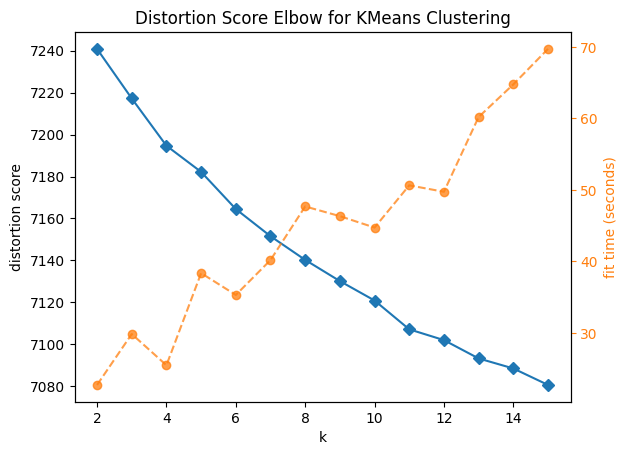

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
# Optimizing K-Means Clustering: Determining Optimal Number of Clusters Using Elbow Method and Visualizations.

# Create a KMeans instance
model  = KMeans(random_state=0)

# Use the KElbowVisualizer to determine the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2, 16), timings=True, locate_elbow=False)

# Fit the visualizer to the TF-IDF data
visualizer.fit(tfidf_pca)

# Visualize the elbow plot
visualizer.show()

In the above code i just iterate over a loop of 2 to 16 clusters and in graph Visualizations i saw the deflation at two point first one is point number 6 and second at point number 11 it look like a forming a **Elbow**.

For confarming the optimal number of cluster for Kmeans lets iterate over a one more chart and also find out Silhouette Scores for each value of K.

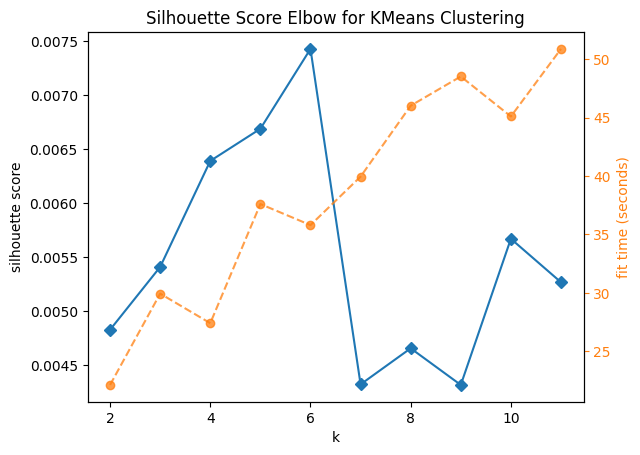

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [82]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(tfidf_pca)

# Finalize and render the figure
visualizer.show()

In [83]:
# Create lists to store Silhouette Scores and corresponding K values
silhouette_scores = []
k_values = list(range(2, 12))  # Assuming you're considering K values from 2 to 12

# Iterate through different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(tfidf_pca)
    silhouette_avg = silhouette_score(tfidf_df, labels)
    silhouette_scores.append(silhouette_avg)

# Print the Silhouette Score for the current K value
    print(f'For K = {k}, Silhouette Score = {silhouette_avg}')



For K = 2, Silhouette Score = 0.004758125518454323
For K = 3, Silhouette Score = 0.005665112022646842
For K = 4, Silhouette Score = 0.006522220078202218
For K = 5, Silhouette Score = 0.006514565623118678
For K = 6, Silhouette Score = 0.007369183816766502
For K = 7, Silhouette Score = 0.00569694770334528
For K = 8, Silhouette Score = 0.005132376092070148
For K = 9, Silhouette Score = 0.005367316084024546
For K = 10, Silhouette Score = 0.006610921911702789
For K = 11, Silhouette Score = 0.006190058636529974


From the above Visualizations and also from the Silhouette Score of K the best optimal number of cluster for our Kmeans clustering is 6 because on it we find good Silhouette Score = 0.007369 .

####Implementation of Kmeans clustring for the Optimal value of K = 6

In [84]:
# Selecting Optimal value of K and Creating the Final K-Means Model.

# Choose the optimal value of K based on the highest Silhouette Score
optimal_k = 6

# Create and fit the K-means model with the optimal K
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
labels = kmeans_model.fit_predict(tfidf_pca)




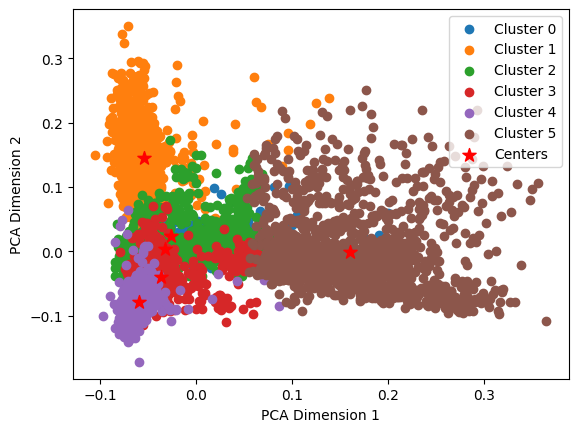

In [85]:
#plotting the results:

# I have already trained the K-means model and obtained 'labels' above

# Now Getting unique labels
unique_labels = np.unique(labels)

# Iterate through unique labels and create scatter plots for each cluster
for label in unique_labels:
    # Select data points belonging to the current cluster
    cluster_data = tfidf_pca[labels == label]

    # Plot the data points of the current cluster with a unique color
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}')

# Plot cluster centers as red stars
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red', marker='*', label='Centers')

# Set labels and legend
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()

# Show the plot
plt.show()


In the above result we can saw all of the six cluster with the centers(represented by star) of each cluster.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The K-Means Clustering model with six clusters was selected based on a combination of the Elbow Method, Silhouette Score, and visual analysis. This model allowed data segmentation and the identification of patterns and similarities within the dataset. The performance of the model was evaluated using Silhouette Scores, with K = 6 resulting in the highest Silhouette Score, indicating the effectiveness of the clustering.

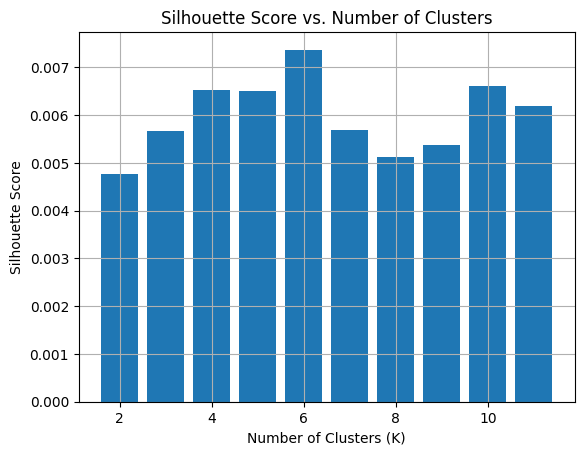

In [86]:
# Visualizing evaluation Metric Score chart of Silhouette Score for KMeans

# Plot the Silhouette Scores
plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In the bar chart representing Silhouette Scores for different numbers of clusters (K), the highest Silhouette Score observed is 0.007369, which corresponds to the number of clusters (K) equal to 6.

####Now create and display word clouds for each cluster and selected attribute in K-Means Model.

In [87]:
# Add cluster values to the dateframe.
data_new['kmeans_cluster'] = kmeans.labels_


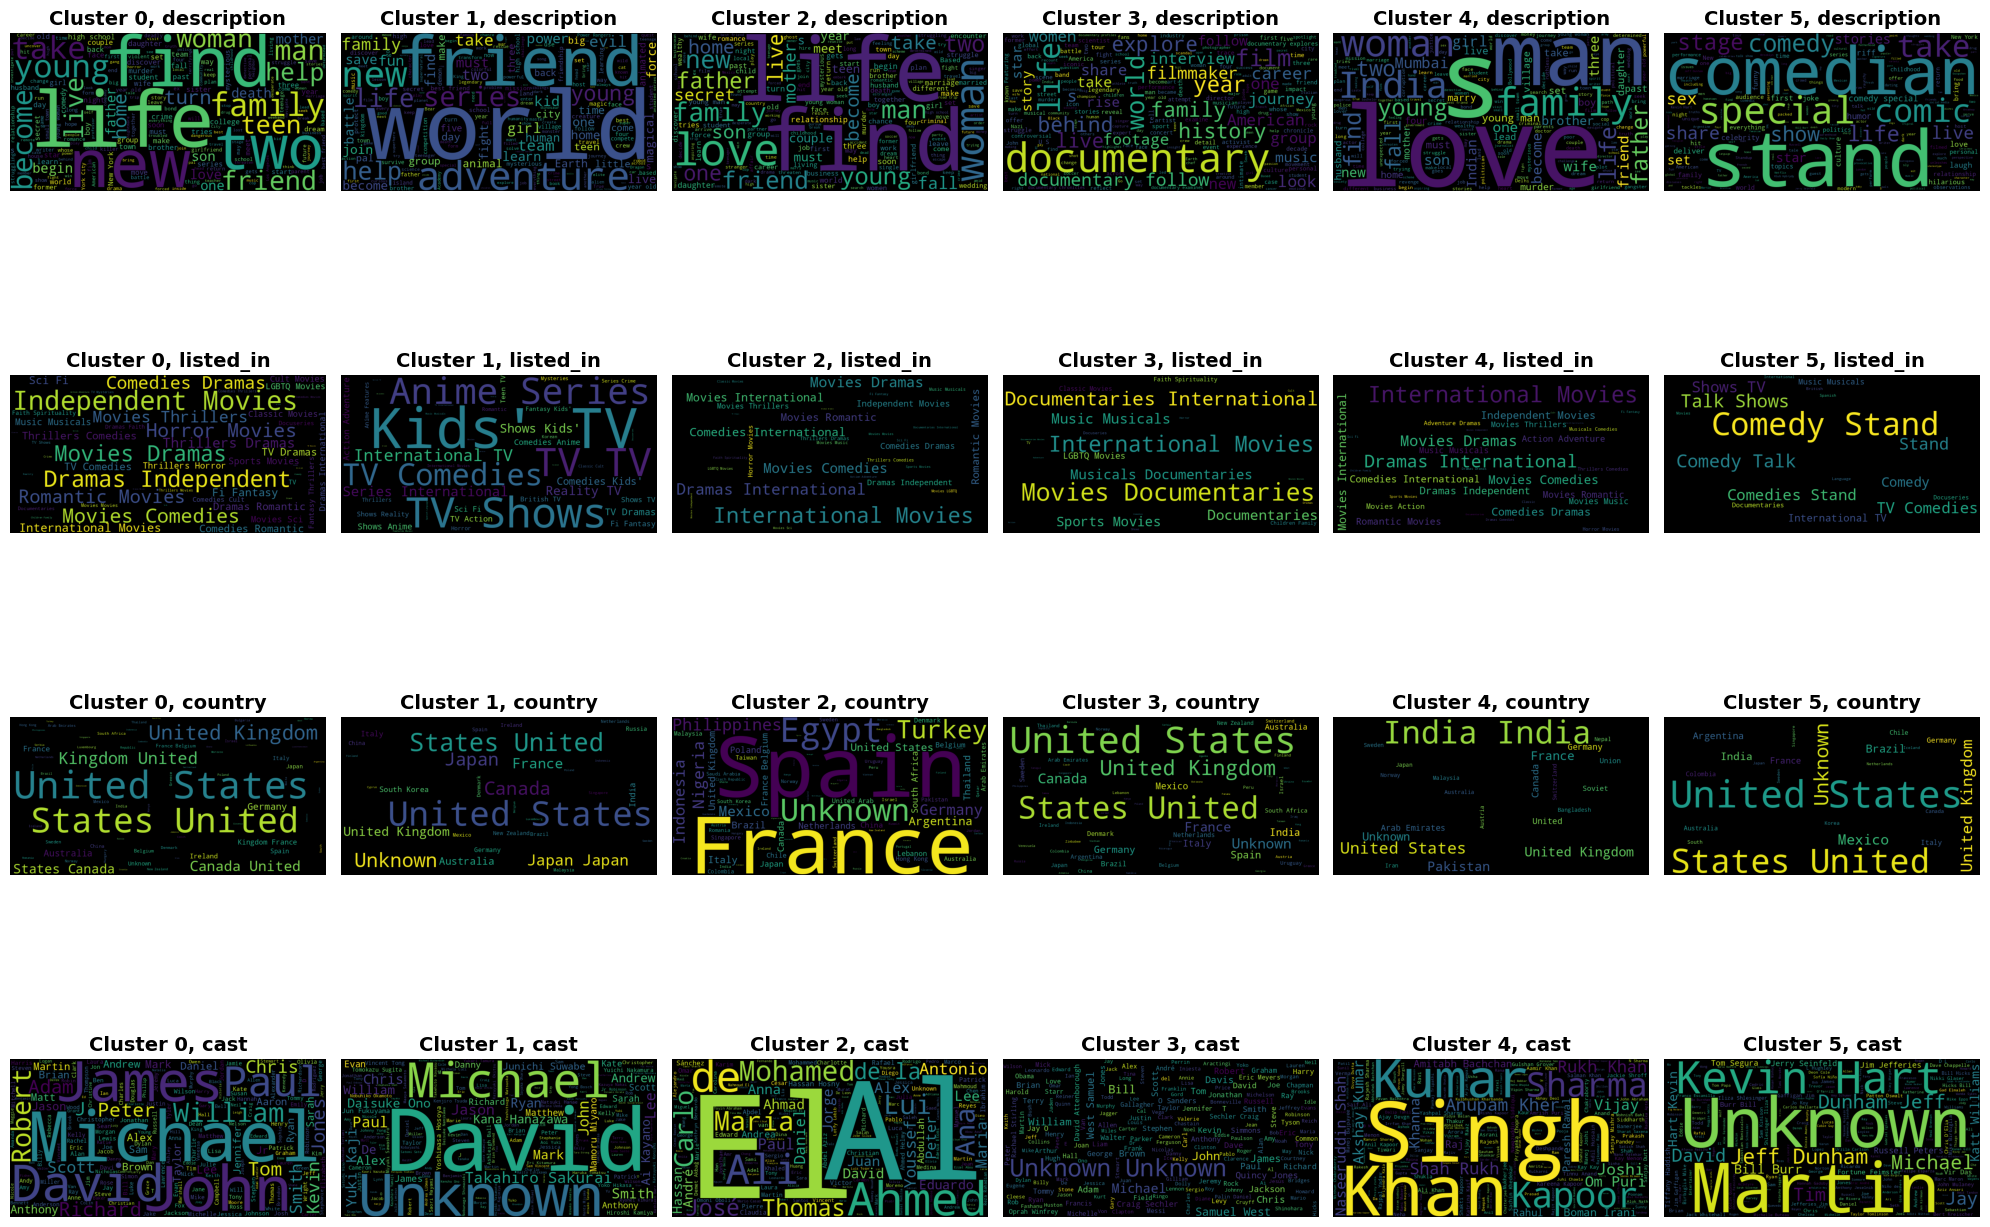

In [88]:
# Define a function to create and display word clouds for each cluster
def kmeans_wordcloud(data_new, cluster_number, column_name, stopwords=set()):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    # Filter data for the specific cluster and column
    cluster_data = data_new[(data_new['kmeans_cluster'] == cluster_number) & (data_new[column_name].notna())]

    # Combine text from the selected column
    text = ' '.join(cluster_data[column_name])

    # Create a WordCloud with customized settings
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='black', width=800, height=400).generate(text)

    # Convert WordCloud object to a NumPy array
    image_array = wordcloud.to_array()

    # Return the NumPy array
    return image_array

# Create subplots for displaying WordCloud images
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))

for i in range(6):
    for j, col in enumerate(['description', 'listed_in', 'country', 'cast']):
        axs[j][i].imshow(kmeans_wordcloud(data_new, i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


The comparisons allow us to understand how the K-Means clustering algorithm has grouped items based on the selected attribute. We can identify which words and themes are associated with each cluster and use this information for various purposes like content recommendation, segmentation, or understanding the structure of your dataset.

### ML Model - 2 - **Hierarchical clustering**


Hierarchical clustering is an unsupervised machine learning technique that arranges data points into a hierarchical tree structure of clusters based on their pairwise similarities, allowing for a multi-level grouping of data. It can be used to reveal different levels of granularity in cluster analysis.

####First we Visualizing Hierarchical Clustering with the help of Dendrogram and Revealing Structure in Movies and TV Shows Based on Euclidean Distances.

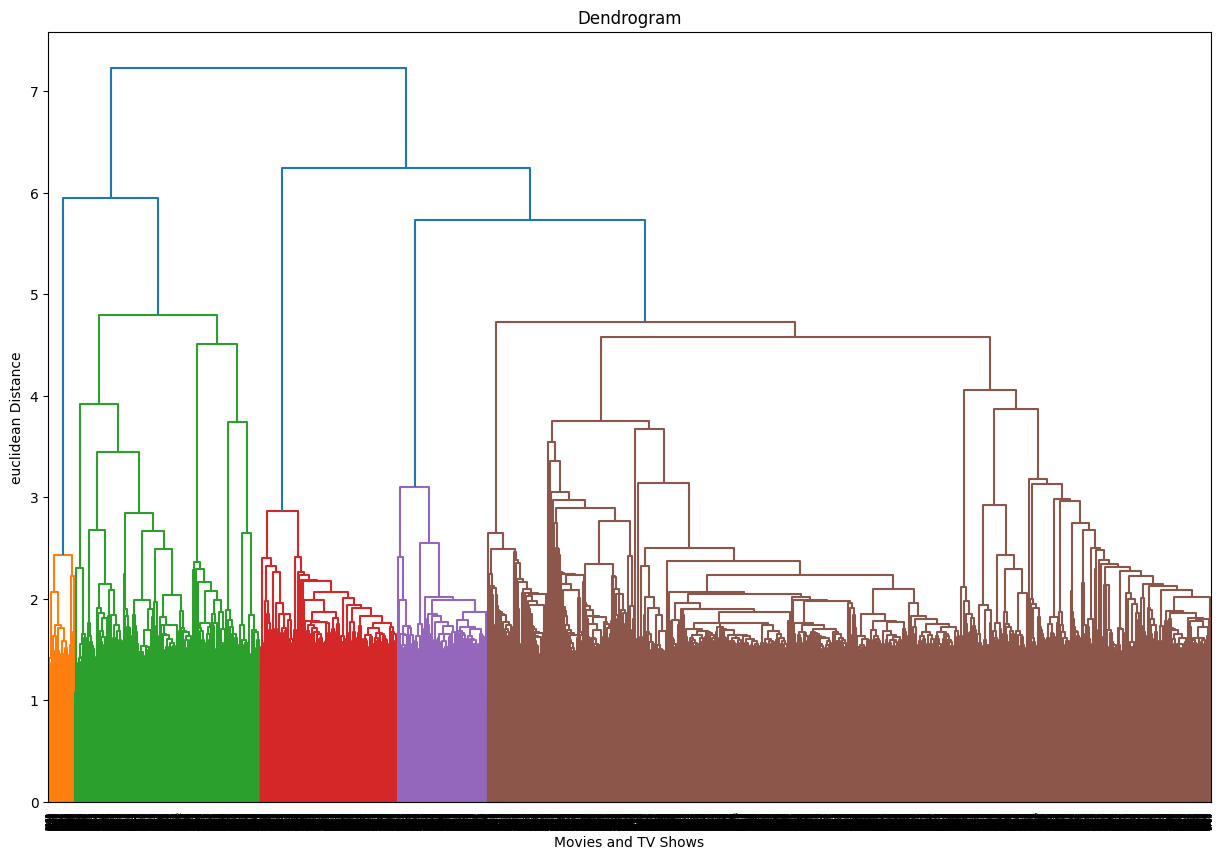

In [74]:
# Calculate the linkage matrix using Ward's method and the euclidean distance

linkage_matrix = linkage(tfidf_pca, metric='euclidean', method='ward')

# Create a dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Movies and TV Shows')
plt.ylabel('euclidean Distance')
plt.show()


From the above Dendogram we can not clear about optimal value of clusters but roughly we can say that optimal value of clusters 3. And before assigning the values to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [75]:
# Silhouette Scores and corresponding K values from your code
k_range = range(2, 6)
silhouette_scores = []

for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(tfidf_pca)
    score = silhouette_score(tfidf_df, labels)
    silhouette_scores.append(score)
    print("k=%d, Silhouette Score=%.4f" % (k, score))

k=2, Silhouette Score=0.0020
k=3, Silhouette Score=0.0024
k=4, Silhouette Score=0.0007
k=5, Silhouette Score=0.0010


####Implementation of Agglomerative Clustering with 3 Clusters to TF-IDF Data.

In [76]:
# Optimal number of clusters
n_clusters = 3

# Create the AgglomerativeClustering model with the optimal number of clusters
model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to your data (tfidf_pca)
cluster_labels = model.fit_predict(tfidf_pca)


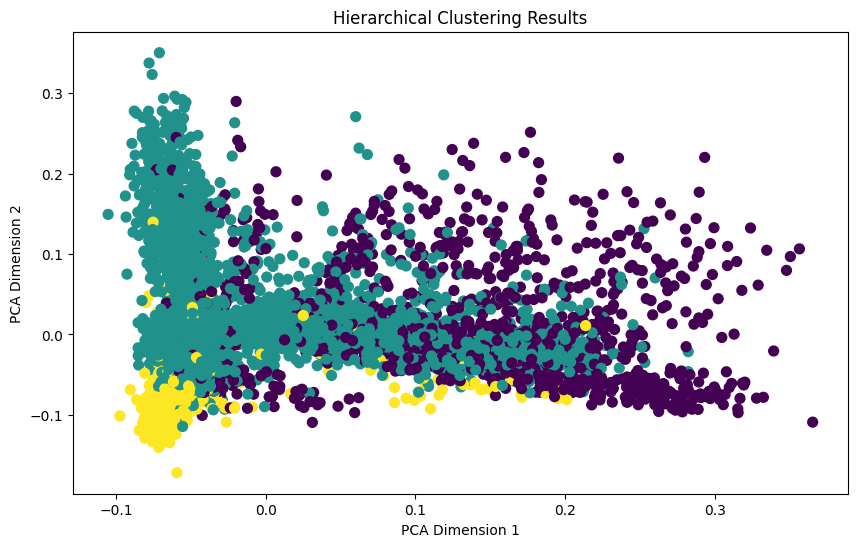

In [77]:
# Scatter plot of data points colored by cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

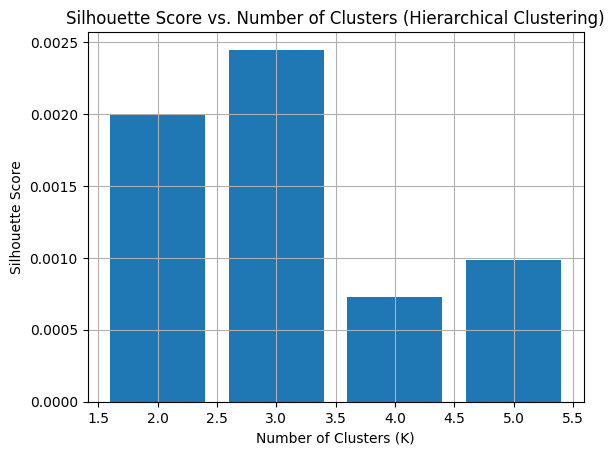

In [78]:
# Visualizing evaluation Metric Score chart of AgglomerativeClustering

# Plot the Silhouette Scores
plt.bar(k_range, silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Hierarchical Clustering)')
plt.grid(True)
plt.show()

In the bar chart representing Silhouette Scores for different numbers of clusters (K), the highest Silhouette Score observed is 0.0024, which corresponds to the number of clusters (K) equal to 3.

####Now create and display word clouds for each cluster and selected attribute.

In [79]:
# Add cluster values to the DataFrame
data_new['agglomerative_cluster'] = cluster_labels


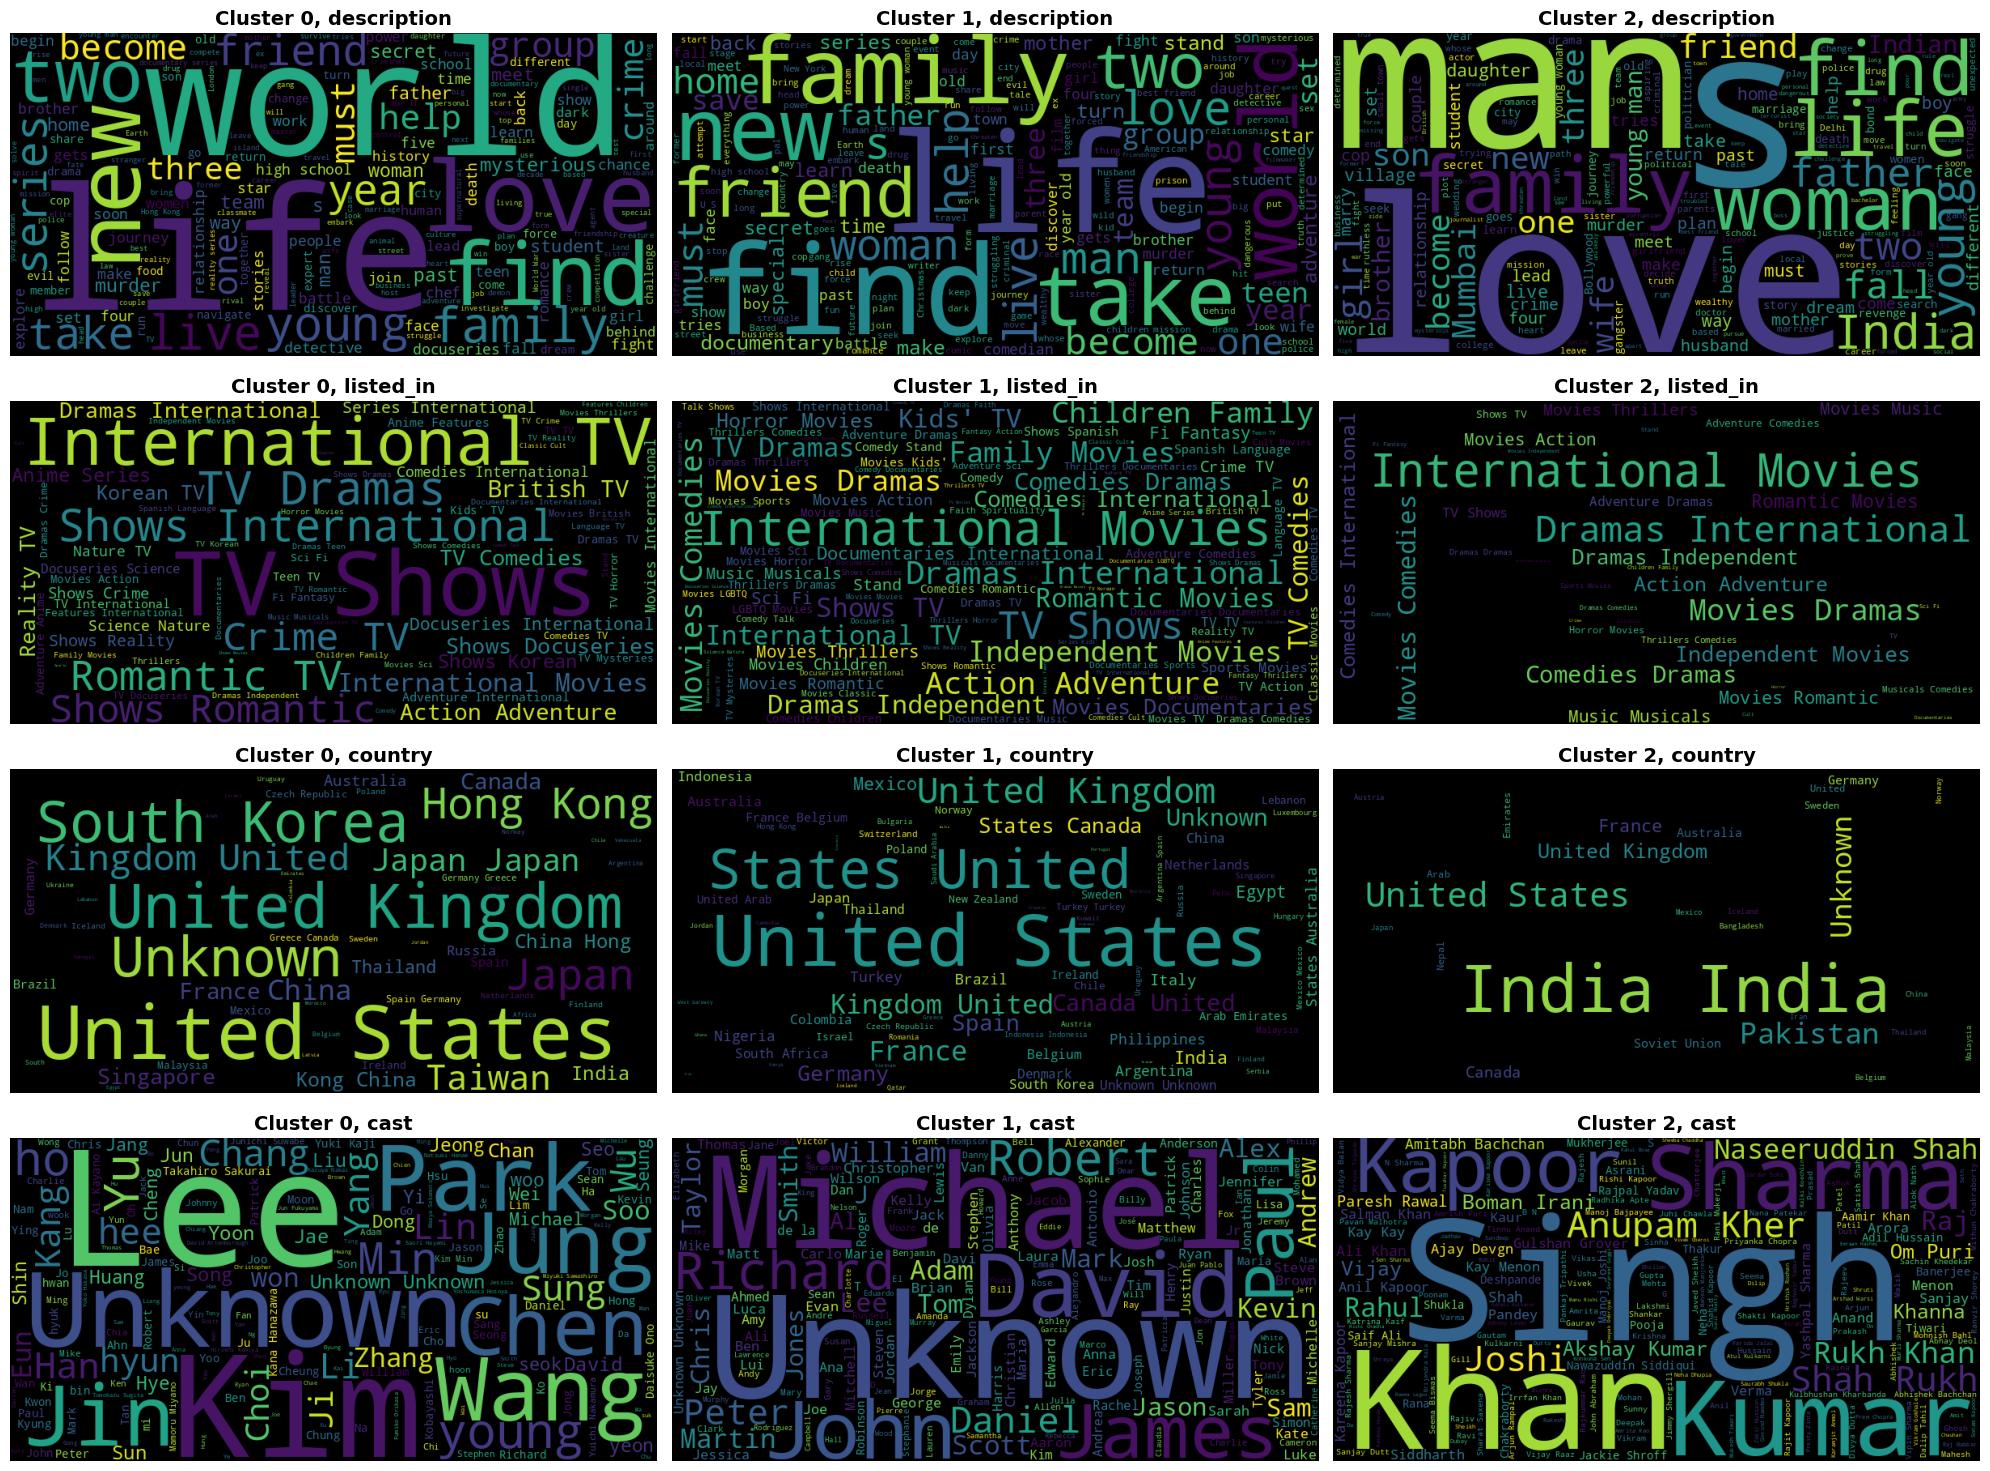

In [80]:
# Define a function to create and display word clouds for each cluster
def agglomerative_wordcloud(data_new, cluster_number, column_name, stopwords=set()):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    # Filter data for the specific cluster and column
    cluster_data = data_new[(data_new['agglomerative_cluster'] == cluster_number) & (data_new[column_name].notna())]

    # Combine text from the selected column
    text = ' '.join(cluster_data[column_name])

    # Create a WordCloud with customized settings
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='black', width=800, height=400).generate(text)

    # Convert WordCloud object to a NumPy array
    image_array = wordcloud.to_array()

    # Return the NumPy array
    return image_array

# Create subplots for displaying WordCloud images
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i in range(3):
    for j, col in enumerate(['description', 'listed_in', 'country', 'cast']):
        axs[j][i].imshow(agglomerative_wordcloud(data_new, i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### ML Model - 3 - **DBSCAN Clustering**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that identifies clusters in a dataset based on the density of data points. It doesn't require specifying the number of clusters in advance and is capable of detecting outliers and noise in the data.

####First we do Implementation of DBSCAN Clustering with Silhouette Score Calculation.

In [94]:
# Create an instance of DBSCAN with specified hyperparameters
dbscan_model = DBSCAN(eps=0.5, min_samples=3)

# Fit the DBSCAN model to the input data (tfidf_pca)
dbscan_model.fit(tfidf_pca)

# Get the predicted cluster labels for the input data
y_dbscan = dbscan_model.labels_
dbscan_labels = dbscan_model.labels_

# Get unique cluster labels
unique_labels_dbscan = np.unique(dbscan_labels)

# Print the predicted labels
print(y_dbscan)

[-1 -1 -1 ... -1 -1 -1]


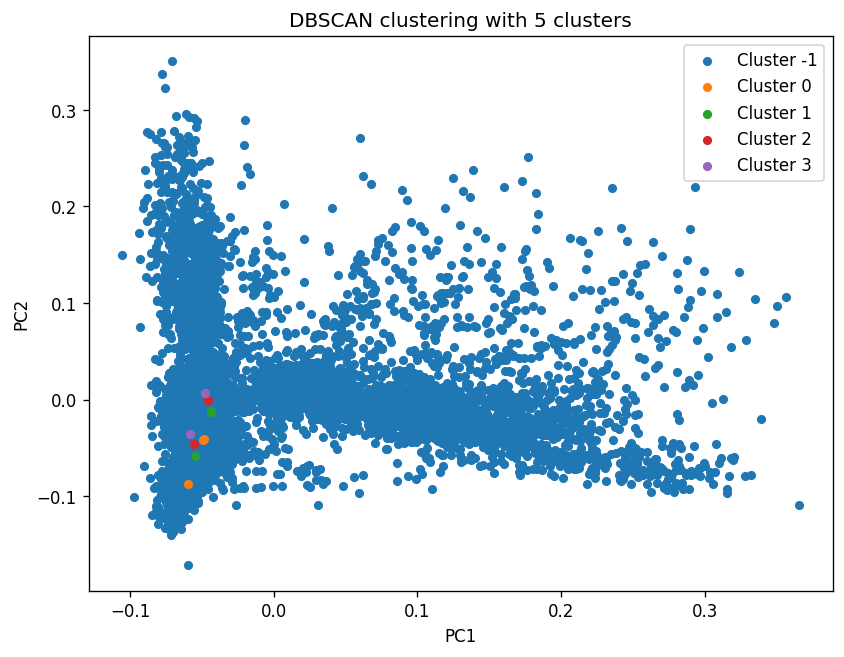

In [95]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_dbscan:
    plt.scatter(tfidf_pca[dbscan_labels == i, 0], tfidf_pca[dbscan_labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.title('DBSCAN clustering with {} clusters'.format(len(unique_labels_dbscan)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


This scatter plot shows the outcome of DBSCAN clustering with five clusters (-1, 0, 1, 2, 3). Each point's color indicates its cluster, revealing how data points are distributed across these clusters in a two-dimensional space defined by PC1 and PC2.

In DBSCAN clustering, a cluster labeled as "-1" typically represents noisy or outlier data points. These are data points that do not belong to any of the well-defined clusters and are considered as noise in the dataset.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Now we create Function to Evaluate DBSCAN Clustering: Obtaining Silhouette Score and Cluster Count for Model Assessment.

In [96]:
# Visualizing evaluation Metric Score chart
# Define a function to evaluate the DBSCAN clustering model and return the Silhouette Score and the number of clusters
def evaluate_clustering_m(model, tfidf_pca, y_dbscan):
    n_clusters = len(set(y_dbscan))
    S_score = silhouette_score(tfidf_pca, y_dbscan)
    return {"n_clusters": n_clusters, "silhouette_score": S_score}

# Apply the evaluation function to the DBSCAN clustering model
evaluation_results = evaluate_clustering_m(dbscan_model, tfidf_pca, y_dbscan)

# Print the number of clusters obtained from DBSCAN
print("Number of clusters:", evaluation_results["n_clusters"])

# Print the Silhouette Score obtained from DBSCAN
print("Silhouette Score:", evaluation_results["silhouette_score"])


Number of clusters: 5
Silhouette Score: 0.0025692895501237254


The DBSCAN clustering model identified 5 clusters, with a Silhouette Score of 0.002569, indicating a low degree of separation between the clusters, suggesting a suboptimal clustering solution.

####Now we Exploring DBSCAN Clustering: Evaluating Silhouette Scores and Number of Clusters Across Different Epsilon Values. And also try to visualize Silhouette Scores and number of clusters.

In [97]:
# Create a range of epsilon values to evaluate
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store evaluation scores
silhouette_scores = []
num_clusters = []

# Loop through different epsilon values and evaluate DBSCAN
for eps in eps_values:
    dbscan_model = DBSCAN(eps=eps, min_samples=3)
    dbscan_model.fit(tfidf_pca)
    y_dbscan = dbscan_model.labels_

    # Number of clusters
    n_clusters = len(set(y_dbscan))
    num_clusters.append(n_clusters)

    # Calculate Silhouette Score only when there are more than one cluster
    if n_clusters > 1:
        S_score = silhouette_score(tfidf_pca, y_dbscan)
        silhouette_scores.append(S_score)
    else:
        # When there's only one cluster, assign a placeholder value to the Silhouette Score
        silhouette_scores.append(None)




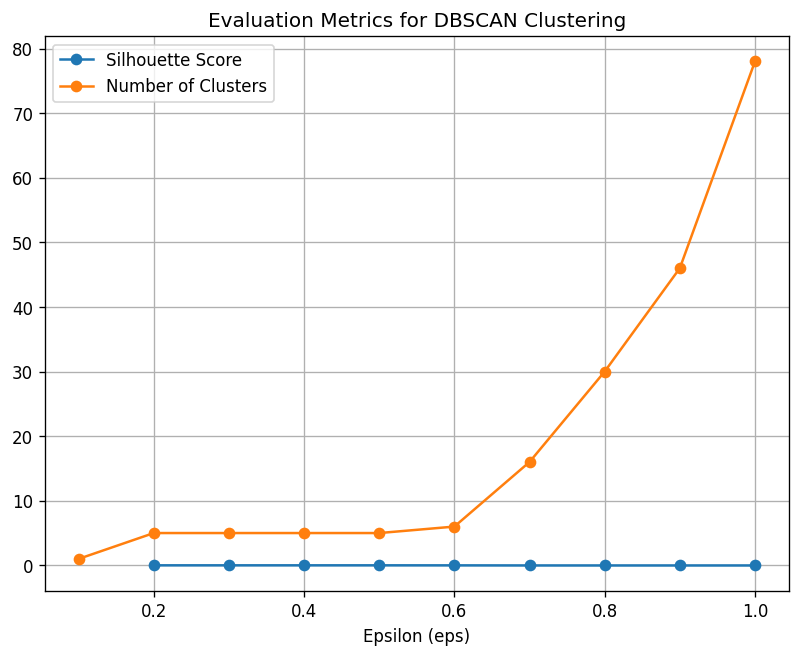

In [98]:
# Create a chart to visualize Silhouette Scores and number of clusters
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(eps_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(eps_values, num_clusters, marker='o', label='Number of Clusters')
plt.xlabel('Epsilon (eps)')
plt.legend()
plt.title('Evaluation Metrics for DBSCAN Clustering')
plt.grid()
plt.show()

At an epsilon (eps) value of 0.6, an 'elbow' is observed in the chart, indicating a significant increase in the number of clusters. This suggests that an optimal clustering solution might be achieved with this epsilon value but Silhouette Scores is - 0.003041 and for eps value 0.5 we got Silhouette Scores is 0.002569 which was positve so we chose the best epsilon value for our DBSCAN model is 0.5 because it provides a more balanced approach with a positive Silhouette Score and a manageable number of clusters(5).

####Now create and display word clouds for each cluster and selected attribute.

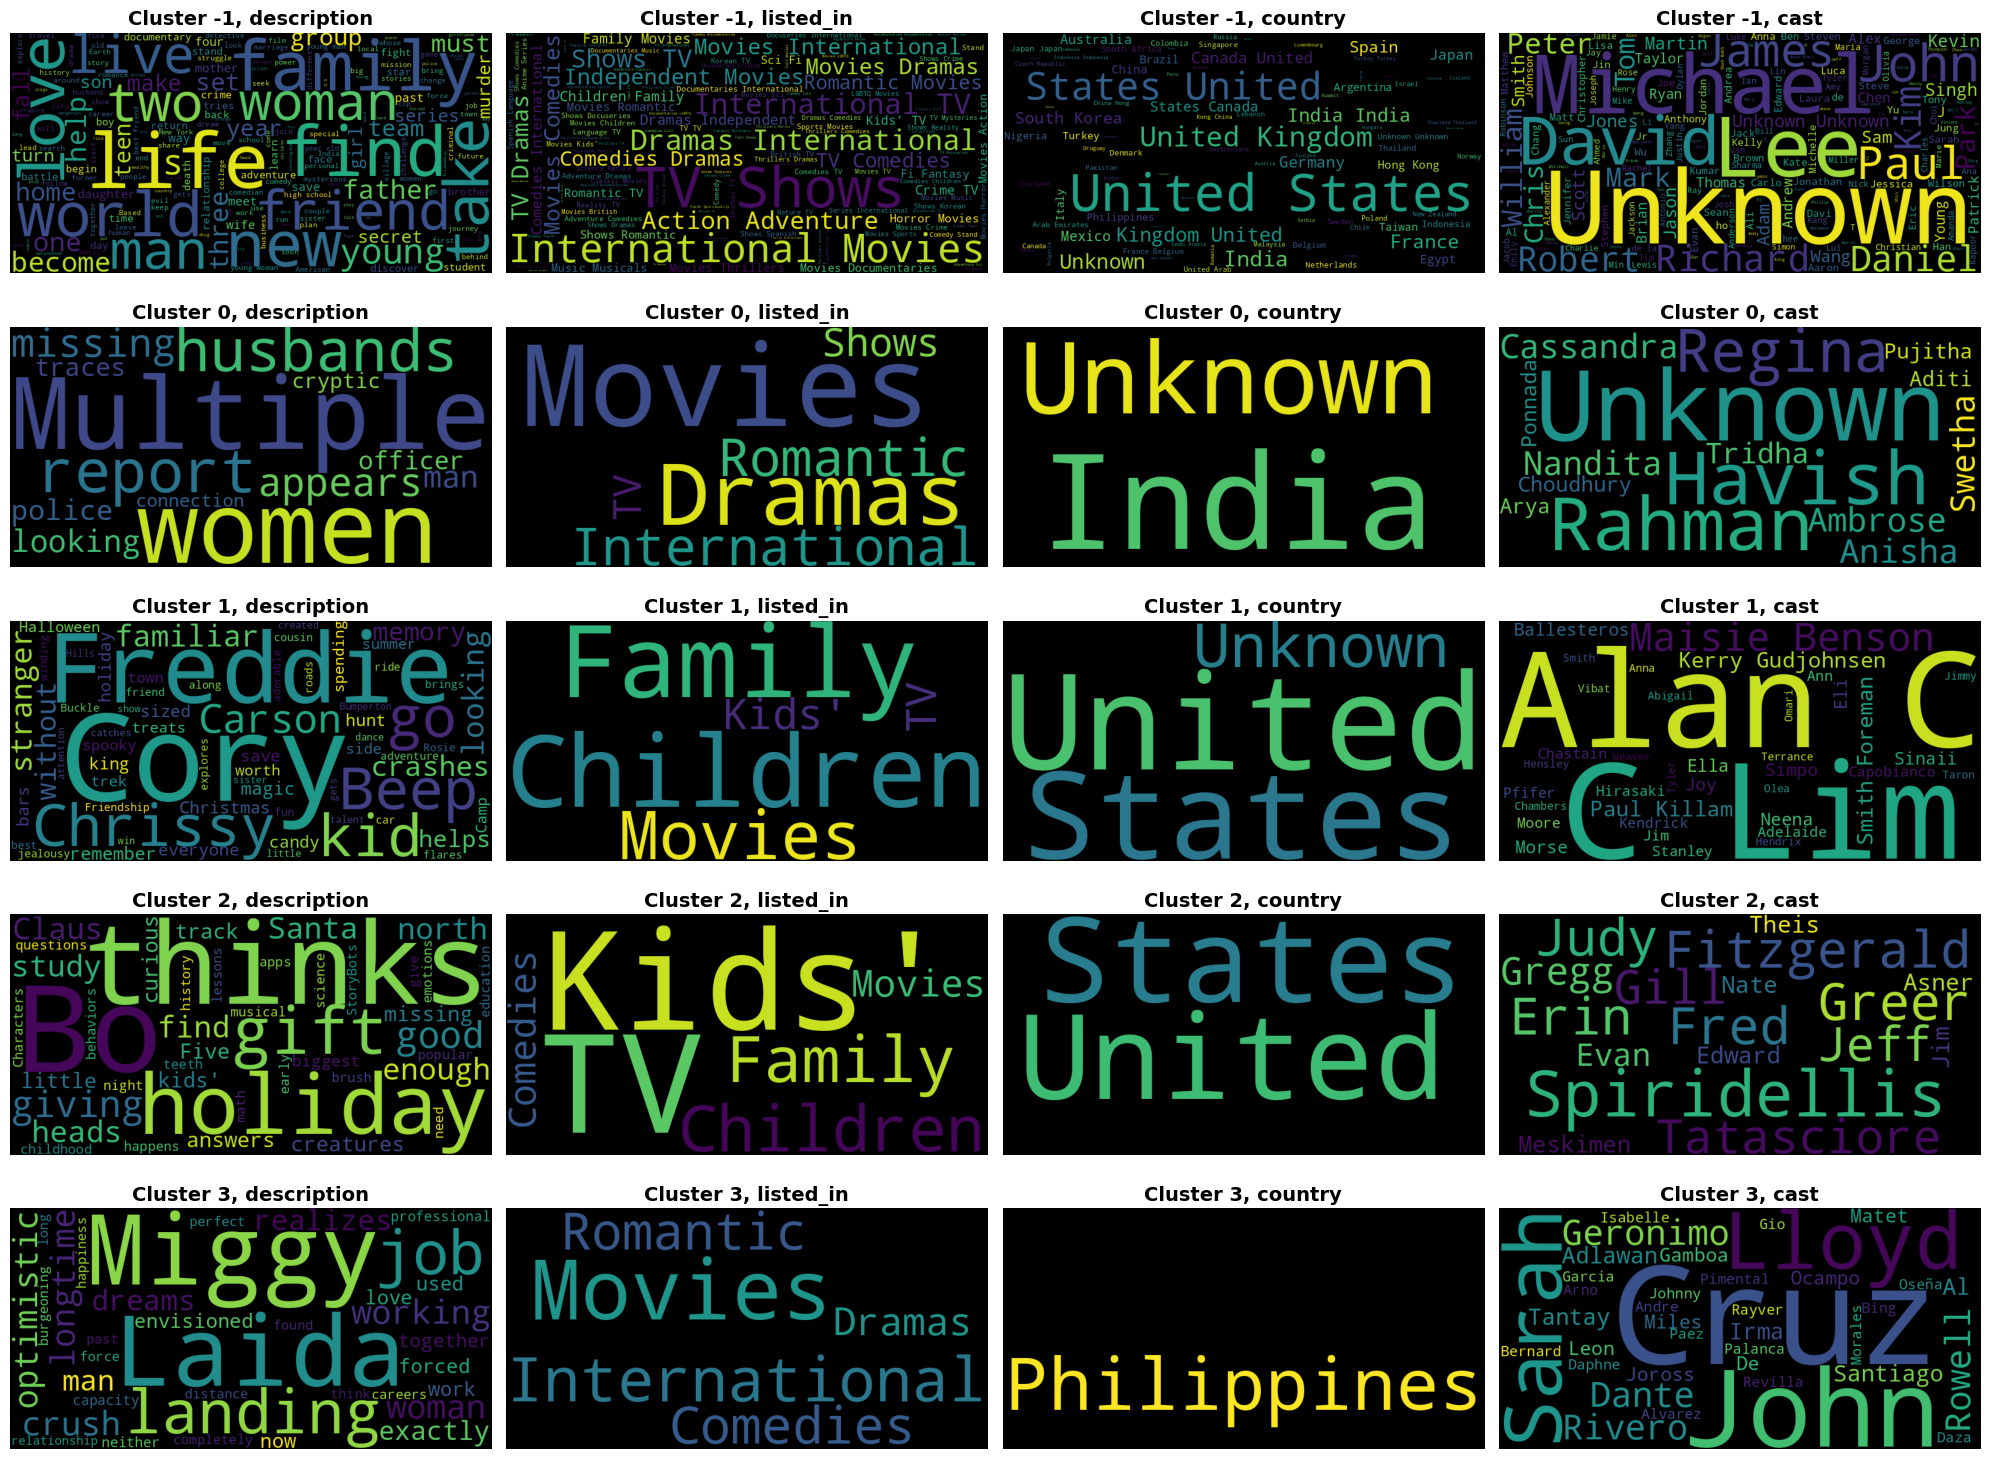

In [95]:
# Add cluster values to the DataFrame.
data_new['dbscan_cluster'] = y_dbscan

# Define a function to create and display word clouds for each DBSCAN cluster
def dbscan_wordcloud(data_new, cluster_number, column_name, stopwords=set()):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    # Filter data for the specific DBSCAN cluster and column
    cluster_data = data_new[(data_new['dbscan_cluster'] == cluster_number) & (data_new[column_name].notna())]

    # Combine text from the selected column
    text = ' '.join(cluster_data[column_name])

    # Create a WordCloud with customized settings
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='black', width=800, height=400).generate(text)

    # Convert WordCloud object to a NumPy array
    image_array = wordcloud.to_array()

    # Return the NumPy array
    return image_array

# Create subplots for displaying WordCloud images for DBSCAN clusters
fig, axs = plt.subplots(nrows=len(unique_labels_dbscan), ncols=4, figsize=(20, 15))

for i, cluster_label in enumerate(unique_labels_dbscan):
    for j, col in enumerate(['description', 'listed_in', 'country', 'cast']):
        axs[i][j].imshow(dbscan_wordcloud(data_new, cluster_label, col))
        axs[i][j].axis('off')
        axs[i][j].set_title(f'Cluster {cluster_label}, {col}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Silhouette Score metrics:-** I used Silhouette Score metrics because Silhouette Score is a metric commonly used for clustering analysis. It provides a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

Silhouette Score is a valuable evaluation metric, especially when working with clustering models for business applications. It helps ensure that the clustering results are meaningful, interpretable, and aligned with business objectives. By using Silhouette Scores, you can make informed decisions, optimize resource allocation, and ultimately have a positive impact on various aspects of your business.






### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose the K-Means clustering as my final model because K-Means model achieved the highest Silhouette Score(**Silhouette Score: 0.007369**) among the three models i evaluated. The Silhouette Score is a metric that assesses the quality of clusters, and a higher score indicates better-defined and well-separated clusters and had an appropriate number of clusters, was easy to interpret.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusions from EDA**

The exploratory data analysis (EDA) of the Netflix movies and TV shows dataset has unveiled valuable insights:

**Content Type Distribution:** The distribution of content types on Netflix is skewed, with movies dominating at 70.4% and TV shows comprising 29.6% of the library. This suggests a potential for diversification to meet various viewer preferences.

**Content Ratings:** "TV-MA" (Mature Audiences) is the most prevalent content rating, followed by "TV-14" (Parents Strongly Cautioned). While TV shows have similar ratings, they tend to have fewer options suitable for younger audiences. These insights can refine content recommendations.

**Top Production Countries:** The United States leads in content production, followed by India and the United Kingdom. Netflix could explore investing more in countries with substantial viewer bases like India.

**Release Year Distribution:** The distribution of release years indicates an increasing trend in content additions from 2000 to 2020, suggesting that newer content is key to keeping the library fresh.

**Title Keywords:** Analysis of keywords in content titles shows that words like "MOVIE," "LOVE," "LIKE," and "HORROR STORY" are frequently used for movies, while TV shows often feature words like "POWER RANGERS," "ANIMATION STUDIOS," "MONSTER," and "CHHOTA BHEEM." This insight can guide promotional strategies.

**Genre Prevalence:** Prominent genres include "Dramas," "Comedies," "Action & Adventure," and "International Movies," reflecting content diversity. Family-friendly genres such as "Family Features" and "Children & Family Movies" are also well-represented.

**TV Show Seasons:** TV shows with a single season are common, suggesting a significant presence of mini-series or single-season shows.

**Content Duration:** The most common duration for TV shows is one season, and for movies, it falls within the range of 80-100 minutes.

**Top Directors and Actors:** Directors such as "Jan Suter" for movies and "Ken Burns" for TV shows, along with actors like "Anupam Kher" and "Shah Rukh Khan" in movies, have a strong presence in Netflix content. Collaborating with these top talents can enhance content quality.

**Yearly and Monthly Additions:** The analysis reveals trends in the total number of movies and TV shows added per year. Movies have shown consistent growth, while TV shows have a slower but positive trend. Popular months for content additions are January, October, and November, while October, November, and December are significant for TV show additions. Daily patterns show variability, with some days having higher additions. Leveraging high-content addition days for marketing and engagement can create positive impacts.


**Conclusion from ML Model**

In this analysis, we explored and implemented three clustering models, namely K-Means Clustering, Agglomerative Hierarchical Clustering, and DBSCAN Clustering, on a dataset of Netflix movies and TV shows. Below are the key findings and conclusions for each of these models:


**K-Means Clustering:**

**Optimal Number of Clusters:** Using the Elbow Method and Silhouette Score, we determined that the optimal number of clusters for K-Means Clustering is 6.

**Performance:** The K-Means model with 6 clusters achieved a Silhouette Score of 0.007369, indicating well-defined and separated clusters. It was selected as the final prediction model for its interpretability and performance.


**Agglomerative Hierarchical Clustering:**

**Optimal Number of Clusters:** While the dendrogram analysis suggested an optimal number of clusters around 3, the Silhouette Score was relatively low, indicating suboptimal clustering.

**Performance:** The Silhouette Score for Agglomerative Clustering was 0.0024, suggesting less distinct clusters. This model did not perform as well as K-Means in this context.

**DBSCAN Clustering:**

**Optimal Epsilon Value:** The evaluation of DBSCAN Clustering suggested that an epsilon value of 0.5 might lead to a more optimal clustering solution, as it exhibited an 'elbow' in the evaluation chart.

**Performance:** The DBSCAN model identified 5 clusters, with a Silhouette Score of 0.002569, indicating a lower degree of separation between clusters. The presence of a noisy or outlier cluster (-1) highlights the ability of DBSCAN to detect such data points.

**Final Model Choice:** The K-Means Clustering model with 6 clusters was chosen as the final prediction model. It achieved the highest Silhouette Score (0.007369) and provided well-separated clusters that are easy to interpret. This model can be instrumental in enhancing user experience and content recommendation on the Netflix platform, ultimately contributing to a positive business impact.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***